#1. PERKENALAN

In [ ]:
'''
Nama  : Rugaya Muksin BSA
Batch : 006
GC    : 1
Phase : 1

'''

#2. IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
plt.style.use('fivethirtyeight')

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Split Dataset and Standarize the Datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier

#3. DATA LOADING

In [2]:
!pip install -q kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

!mkdir ./kaggle
!mv ./kaggle.json ./kaggle

In [4]:
!chmod 600 ~/.kaggle/kaggle.json #akses dengan rootnya
!ls ~/.kaggle

kaggle.json


In [5]:
!kaggle datasets download -d brllrb/uber-and-lyft-dataset-boston-ma

 92% 41.0M/44.5M [00:00<00:00, 123MB/s]
100% 44.5M/44.5M [00:00<00:00, 128MB/s]


In [6]:
!mkdir cab
!unzip uber-and-lyft-dataset-boston-ma.zip -d cab

Archive:  uber-and-lyft-dataset-boston-ma.zip
  inflating: cab/rideshare_kaggle.csv  


In [7]:
cab_ori = pd.read_csv('./cab/rideshare_kaggle.csv')

In [8]:
cab = cab_ori.copy()

In [9]:
cab.shape

(693071, 57)

Diketahui bahwa kita memiliki sebuah dataset yang berisi 57 informasi dan 693071 data mengenai cab (uber & lyft) di Boston

#4. DATA CLEANING

In [10]:
'''
Menampilkan general informasi tentang dataset

'''

cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [11]:
'''
Cek apakah terdapat missing value pada dataset yang akan diolah

'''

pd.DataFrame({
    'missing value': cab.isnull().sum()
})

,missing value
id,0
timestamp,0
hour,0
day,0
month,0
datetime,0
timezone,0
source,0
destination,0
cab_type,0


Terdapat missing value pada varibel/kolom **price** sebesar 55095 dari 693071 data

In [12]:
'''
Cek presentase missing value yang ada pada setiap kolom dataset

'''

pd.DataFrame({
    'missing value': cab.isnull().mean()
})

,missing value
id,0.000000
timestamp,0.000000
hour,0.000000
day,0.000000
month,0.000000
datetime,0.000000
timezone,0.000000
source,0.000000
destination,0.000000
cab_type,0.000000


Terdapat missing value pada varibel/kolom **price** dengan presentase 0.079494

In [13]:
'''
Cek missing value pada kolom price

'''

a = cab[cab.price.isnull()]
a.head(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
18,fa5fb705-03a0-4eb9-82d9-7fe80872f754,1.543674e+09,14,1,12,2018-12-01 14:13:04,America/New_York,North End,West End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,1.11,1.0,42.3647,-71.0542,36.99,32.27,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.68,5.87,6.26,1543672800,9.910,44.66,1543690800,35.04,1543712400,43.99,1543690800,35.69,1543712400,partly-cloudy-day,27.53,1022.32,344,0.44,1,9.910,280.1,1543665331,1543698851,0.82,0.0000,1543683600,31.71,1543658400,44.66,1543690800,28.06,1543658400,43.99,1543690800
31,eee70d94-6706-4b95-a8ce-0e34f0fa8f37,1.543795e+09,23,2,12,2018-12-02 23:52:56,America/New_York,Beacon Hill,South Station,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,2.48,1.0,42.3588,-71.0707,48.83,48.83,Overcast,Light rain until evening.,0.0,0.0,0.96,2.83,2.98,1543755600,7.790,50.73,1543788000,44.99,1543816800,50.06,1543788000,45.64,1543816800,cloudy,47.81,1002.81,275,1.00,0,7.790,287.3,1543751797,1543785238,0.86,0.0904,1543770000,36.45,1543726800,50.73,1543788000,35.85,1543748400,50.06,1543788000
40,7f47ff53-7cf2-4a6a-8049-83c90e042593,1.543524e+09,20,29,11,2018-11-29 20:38:05,America/New_York,North Station,Fenway,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,2.94,1.0,42.3661,-71.0631,42.50,36.47,Partly Cloudy,Partly cloudy throughout the day.,0.0,0.0,0.54,10.68,17.15,1543514400,9.772,44.66,1543510800,28.68,1543575600,38.30,1543510800,27.26,1543568400,partly-cloudy-day,26.84,1008.44,314,0.35,0,9.772,307.4,1543492404,1543526094,0.75,0.0000,1543510800,35.15,1543550400,44.66,1543510800,30.98,1543550400,38.30,1543510800
60,43abdbe4-ab9e-4f39-afdc-31cfa375dc25,1.544732e+09,20,13,12,2018-12-13 20:10:16,America/New_York,North End,West End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,1.16,1.0,42.3647,-71.0542,33.15,30.60,Mostly Cloudy,Partly cloudy throughout the day.,0.0,0.0,0.57,3.02,3.02,1544738400,9.956,33.83,1544731200,27.27,1544781600,32.85,1544734800,24.61,1544785200,partly-cloudy-day,19.51,1033.96,96,0.81,0,9.956,330.1,1544702792,1544735599,0.21,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
69,80db1c49-9d51-4575-a4f4-1ec23b4d3e31,1.543583e+09,13,30,11,2018-11-30 13:08:03,America/New_York,North End,Beacon Hill,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,2.67,1.0,42.3647,-71.0542,31.80,31.80,Clear,Mostly cloudy throughout the day.,0.0,0.0,0.83,2.10,4.79,1543554000,10.000,42.52,1543600800,31.71,1543658400,40.53,1543611600,28.06,1543658400,clear-day,27.14,1017.01,296,0.01,0,10.000,277.1,1543578867,1543612470,0.79,0.0003,1543593600,28.79,1543579200,42.52,1543600800,26.41,1543575600,40.53,1543611600


Skewness :  1.0457470560899256


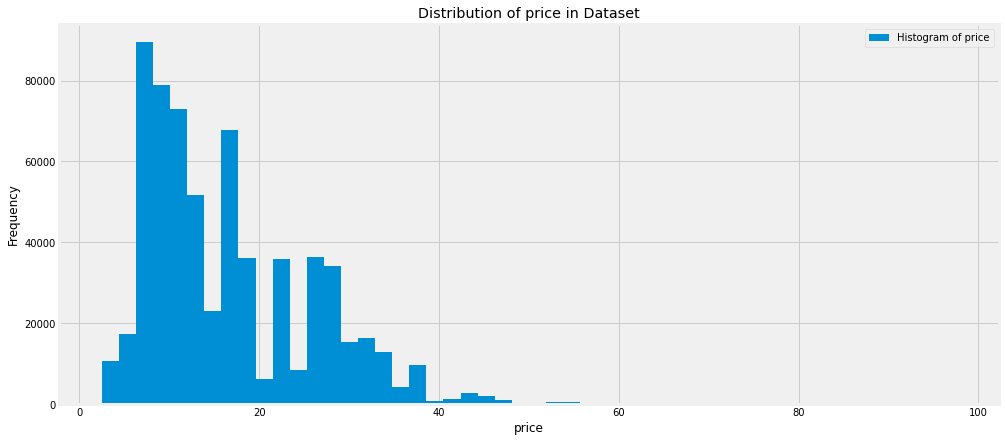

In [14]:
'''
Cek jenis distribusi data yang ada pada variabel/kolom price

'''

fig, ax = plt.subplots(1, 1, figsize=(15, 7))

cab.price.hist(bins=50, ax=ax, label='Histogram of price') # Histogram of original dataset
ax.set_title('Distribution of price in Dataset')
ax.set_xlabel('price')
ax.set_ylabel('Frequency')
ax.legend(loc="upper right")

print('Skewness : ', cab.price.skew())

Berdasarkan visualisasi atau nilai skewness bahwa **variabel/kolom price dengan missing value memiliki distribusi skewed**.

Saya memutuskan untuk remove all rows yang mengandung missing value. Dikarenakan ini menyangkut mengenai harga dan besar kecilnya harga ditentukan oleh banyak faktor. Jadi jika di filling dengan nilai entah menggunakan mean/median, saya rasa bukan treatment yang tepat untuk handle missing value yang ada pada variabel price hanya berdasarkan nilai rata-rata dari variabel price.

In [15]:
rows_without_missing_data = cab.dropna()

In [16]:
cab = rows_without_missing_data

In [17]:
cab.shape

(637976, 57)

Setelah dihandling missing value pada kolom price, terlihat bahwa data yang kita miliki sebanyak 637967 data.

#5. EDA

In [19]:
'''
Cek persebaran statistik pada dataset

'''

cab.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.379760e+05,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.00000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,6.379760e+05,637976.000000,637976.000000,6.379760e+05,637976.000000,6.379760e+05,637976.000000,6.379760e+05,637976.000000,6.379760e+05,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,6.379760e+05,6.379760e+05,637976.000000,637976.000000,6.379760e+05,637976.000000,6.379760e+05,637976.000000,6.379760e+05,637976.000000,6.379760e+05,637976.000000,6.379760e+05
mean,1.544046e+09,11.618528,17.797674,11.586550,16.545125,2.189261,1.015068,42.338161,-71.066144,39.582406,35.87844,0.008909,0.145941,0.741056,6.186795,8.470616,1.544049e+09,8.469180,45.039586,1.544050e+09,34.148928,1.544102e+09,41.612514,1.544050e+09,30.137973,1.544099e+09,31.652281,1010.092744,220.112705,0.686291,0.249031,8.469180,313.515634,1.544027e+09,1.544060e+09,0.579076,0.037369,1.544044e+09,33.456171,1.544042e+09,45.259945,1.544047e+09,29.729028,1.544048e+09,41.995876,1.544048e+09
std,6.892028e+05,6.948776,9.982083,0.492452,9.324359,1.135413,0.095422,0.047856,0.020303,6.725500,7.91726,0.026880,0.328776,0.138575,3.147856,5.288683,6.928507e+05,2.601828,5.996033,6.938211e+05,6.381731,6.923133e+05,7.665189,6.941980e+05,8.056278,6.927580e+05,9.141390,13.475580,99.087172,0.358599,0.474306,2.601828,27.951377,6.911634e+05,6.906875e+05,0.244674,0.055216,6.912268e+05,6.466349,6.902087e+05,5.644414,6.901597e+05,7.109907,6.872011e+05,6.935538,6.911036e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.13000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.270000,1.000000,42.350300,-71.081000,36.450000,31.91000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.90000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.660000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.660000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.930000,1.000000,42.364700,-71.054200,43.580000,40.01000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09,35.320

###5.1 Visualisasi variabel price terhadap variabel lainnya 

**5.1.1 Price vs Distance**

Text(0.5, 1.0, 'Price vs Distance')

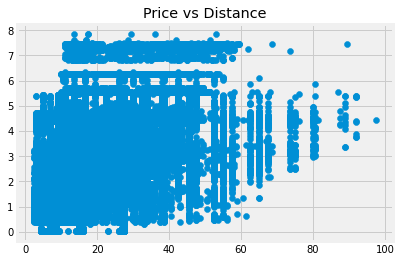

In [20]:
plt.scatter(cab.price, cab.distance)
plt.title("Price vs Distance")

Secara logika semakin jauh jarak maka semakin besar harga yang akan dibayar, dari hasil visualisasi terbukti bahwa semakin besar nilai pada variabel distance, nilai pada variabel price juga semakin besar.

**5.1.2 Price vs Temperature**

Text(0.5, 1.0, 'Price vs Temperature')

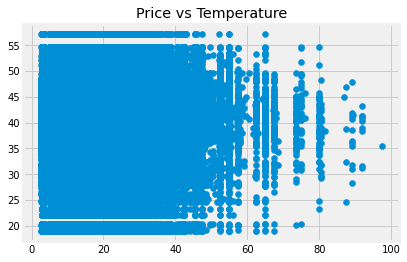

In [21]:
plt.scatter(cab.price, cab.temperature)
plt.title("Price vs Temperature")

Terlihat bahwa nilai pada variabel temperature dan nilai pada variabel price tidak saling mempengaruhi

**5.1.3 Price vs Humidity**

Text(0.5, 1.0, 'Price vs Humidity')

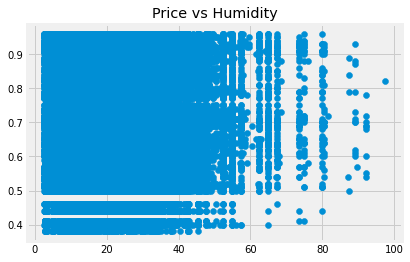

In [22]:
plt.scatter(cab.price, cab.humidity)
plt.title("Price vs Humidity")

Terlihat bahwa nilai pada variabel humidity(kelembapan) dan nilai pada variabel price tidak saling mempengaruhi

###5.2 MEMISAHKAN FITUR NUMERIK DAN NON NUMERIK (KATEGORIK)

In [24]:
target = ['price']
cat_feature = ['id', 'datetime', 'timezone', 'source', 'destination', 'cab_type', 'product_id', 'name', 'short_summary', 'long_summary', 'icon']
num_feature = [i for i in cab.columns if i not in (target + cat_feature)]

###5.3 VISUALISASI DISTRIBUSI DATA PADA FITUR NUMERIK

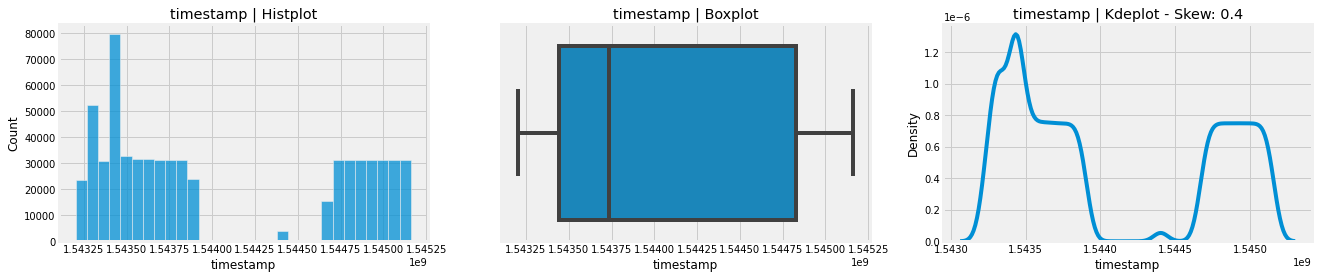

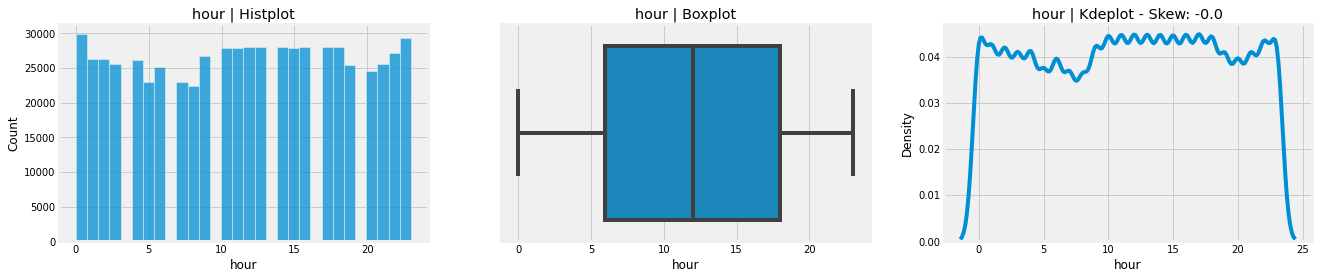

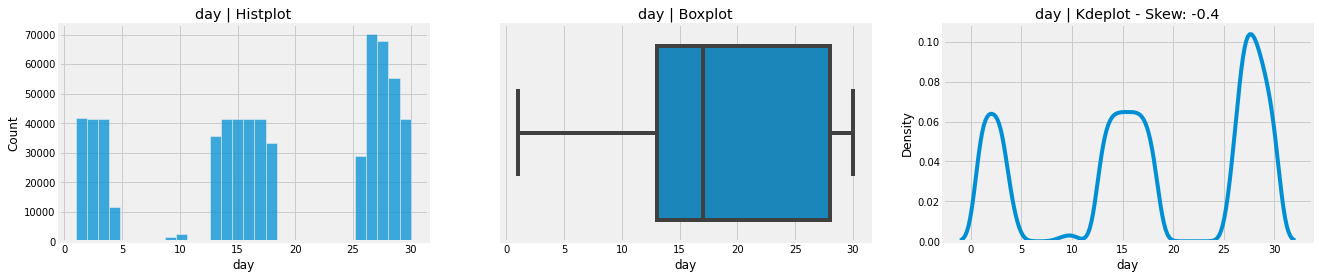

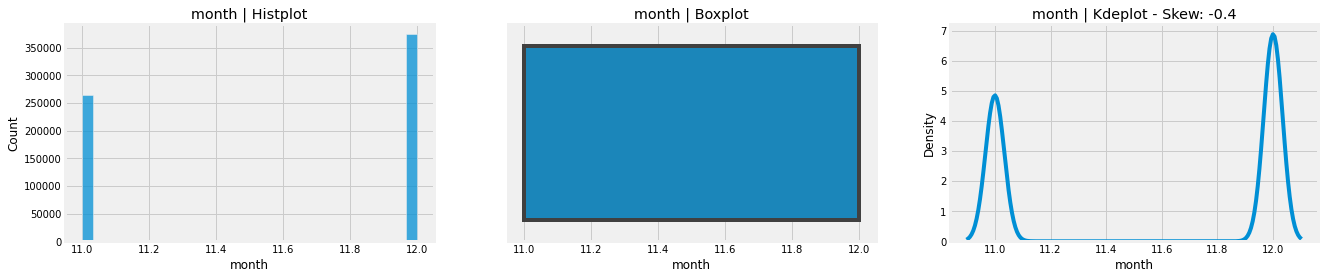

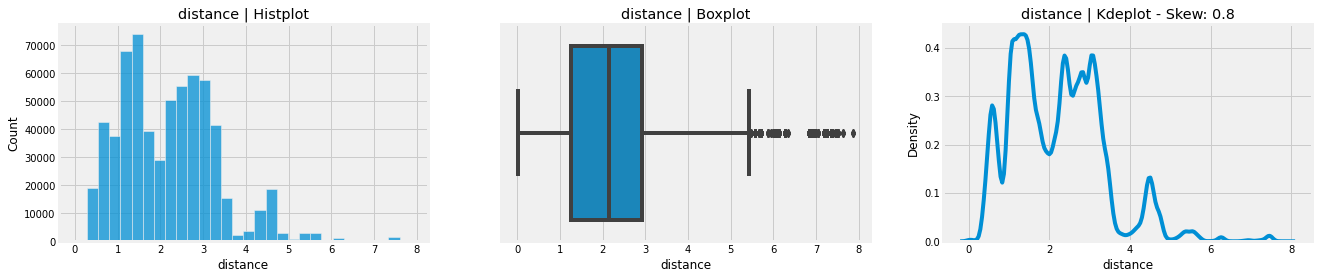

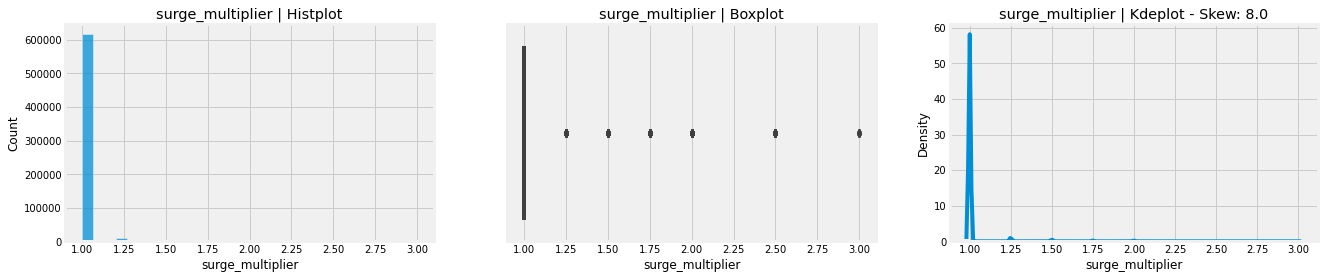

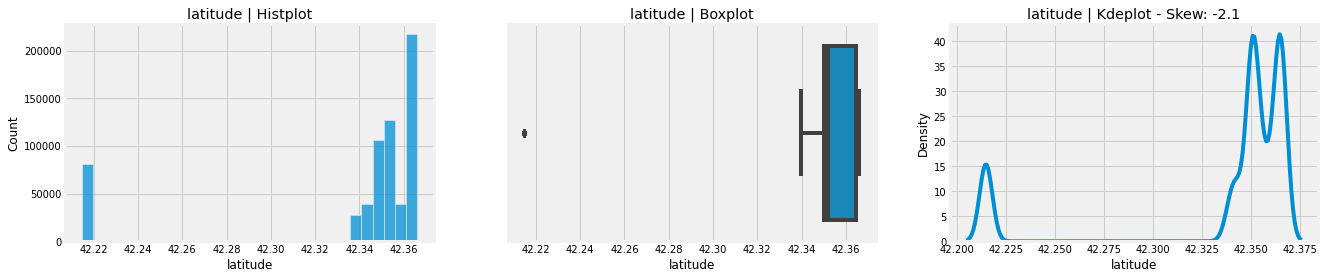

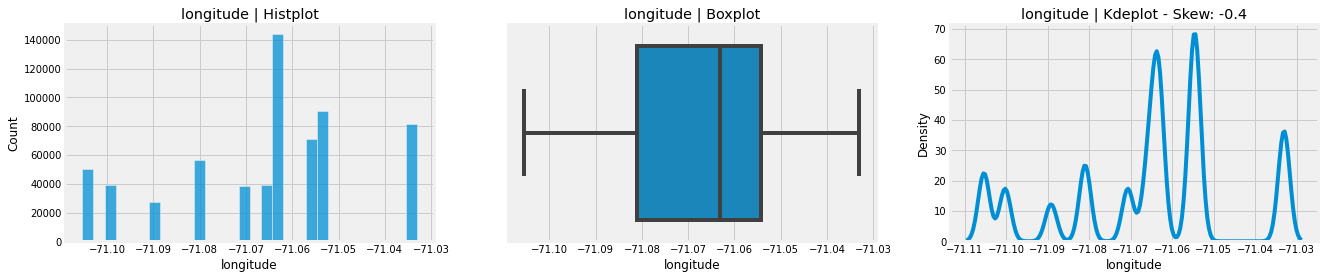

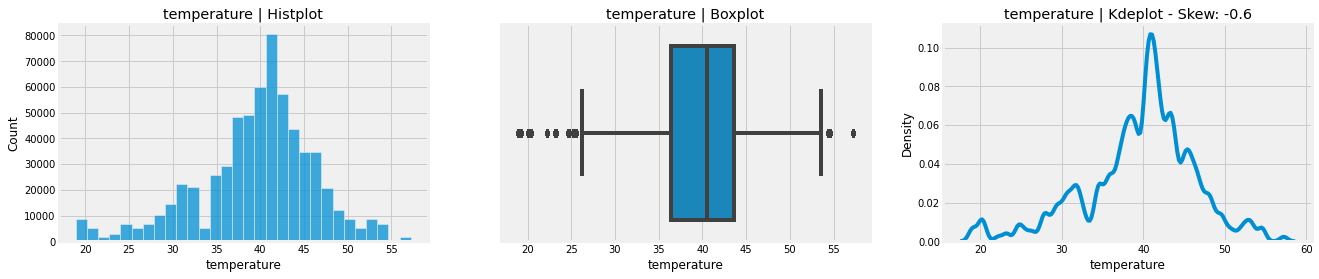

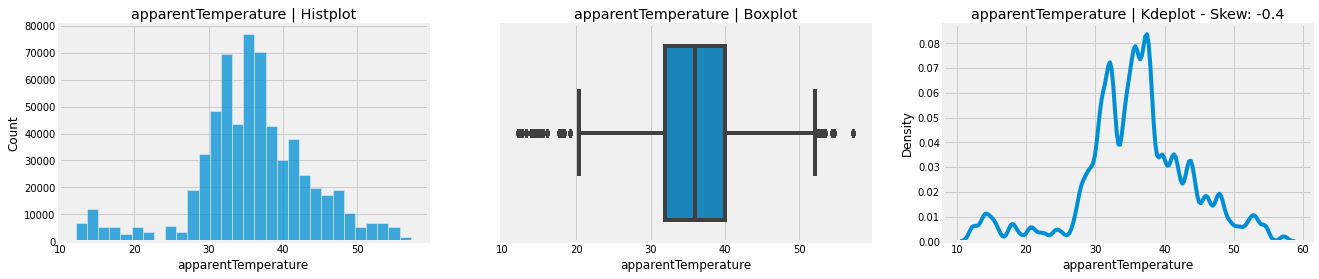

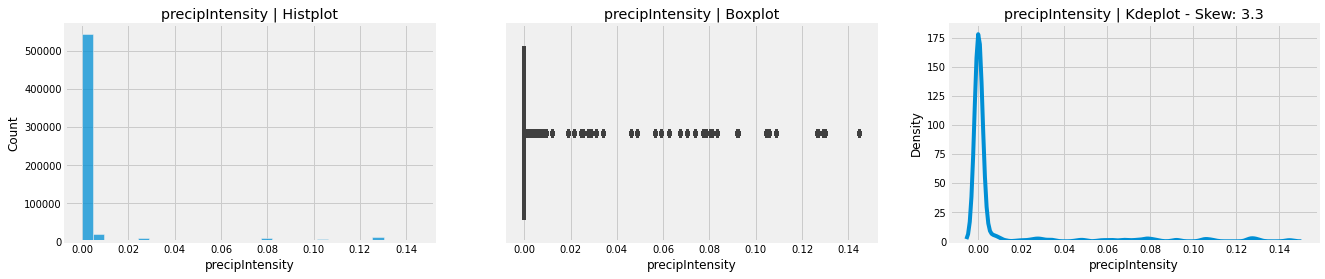

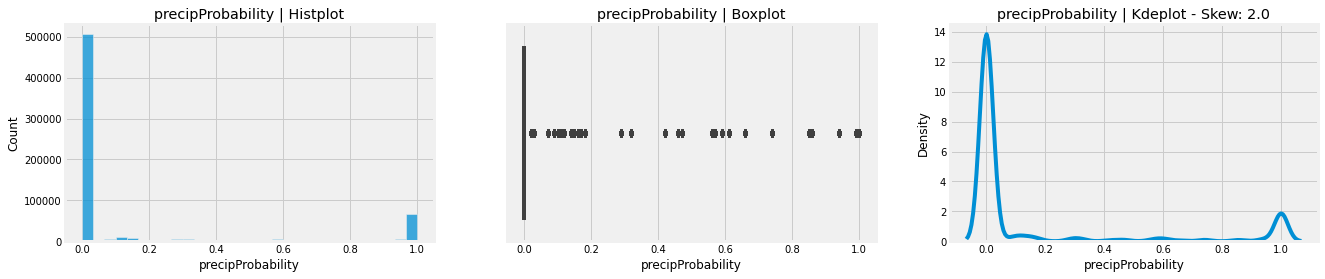

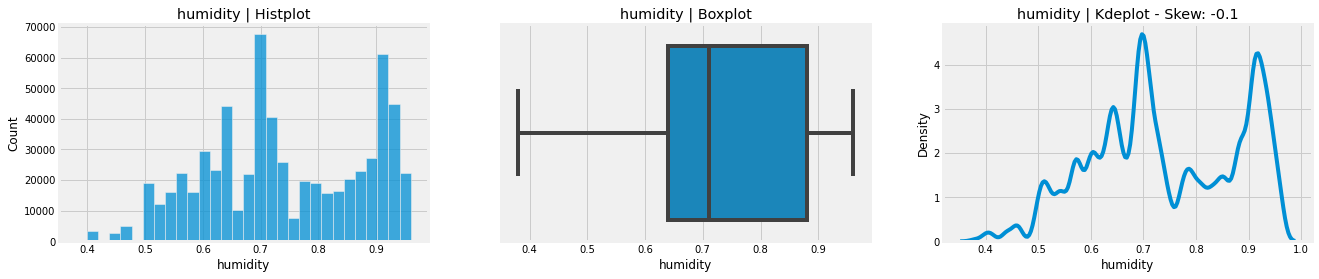

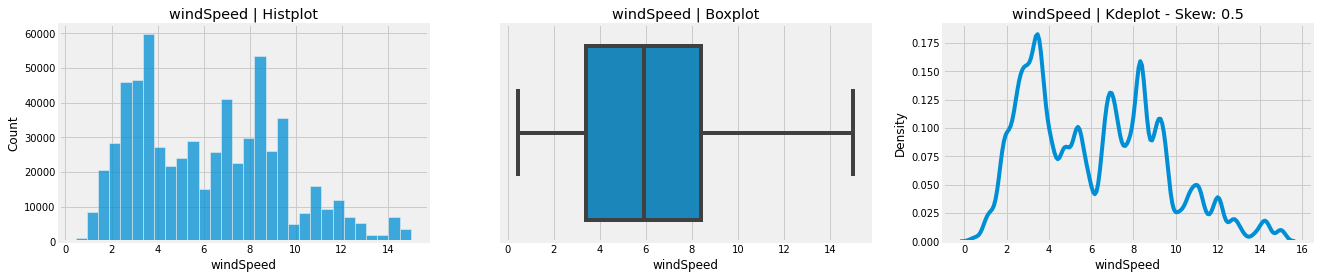

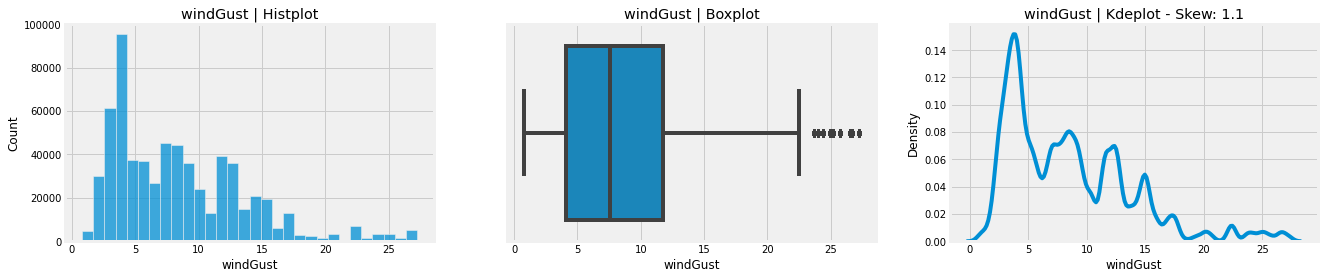

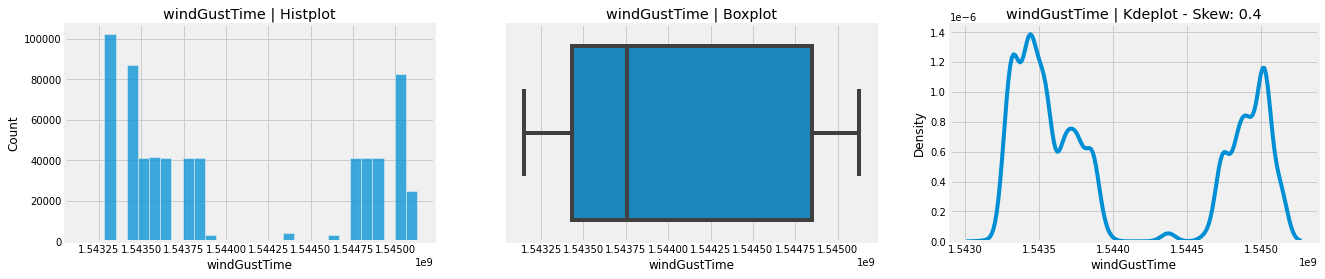

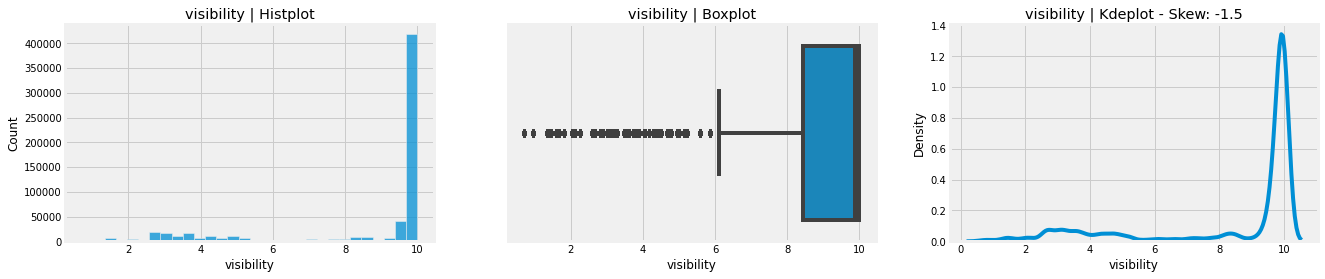

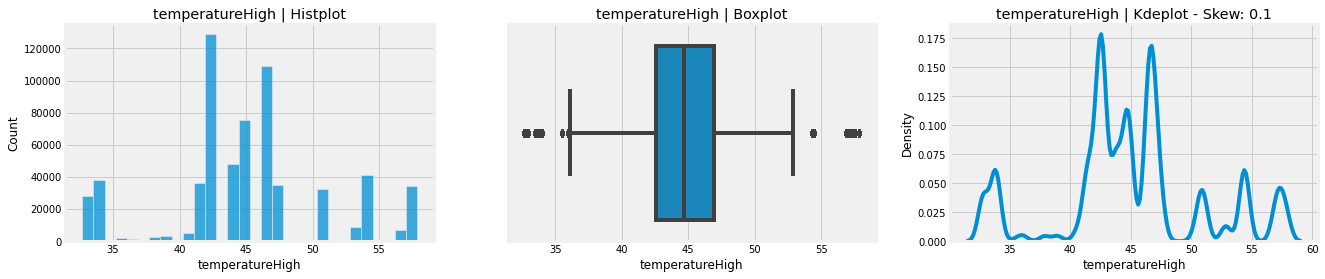

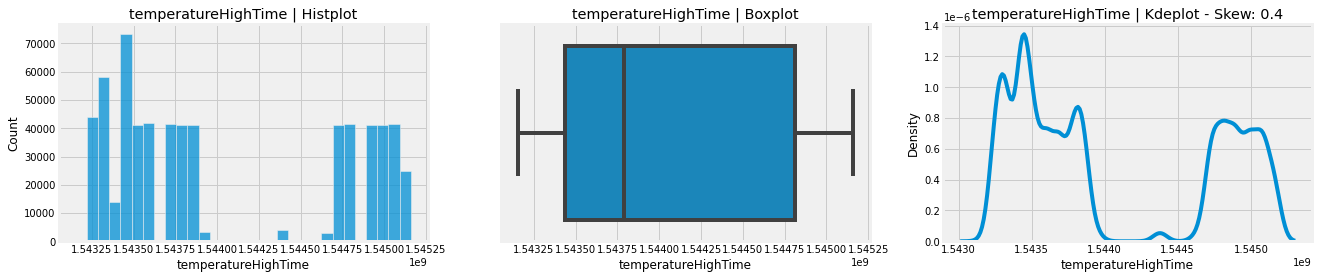

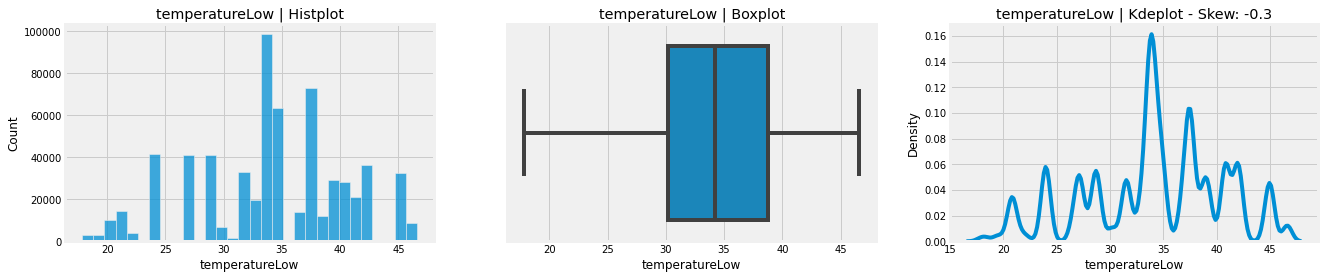

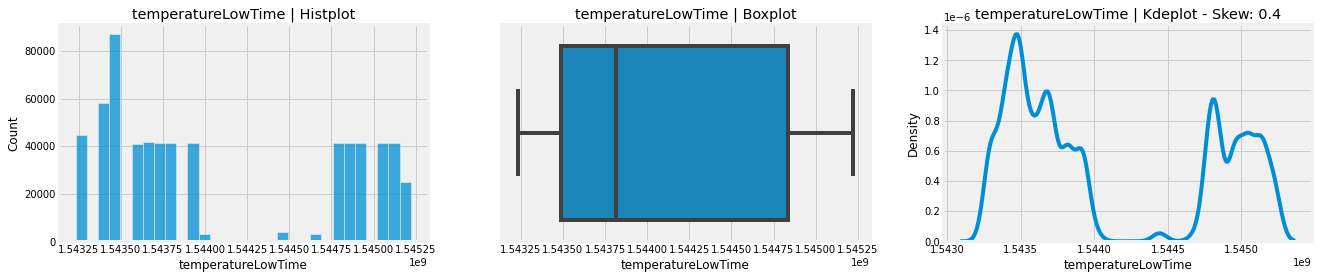

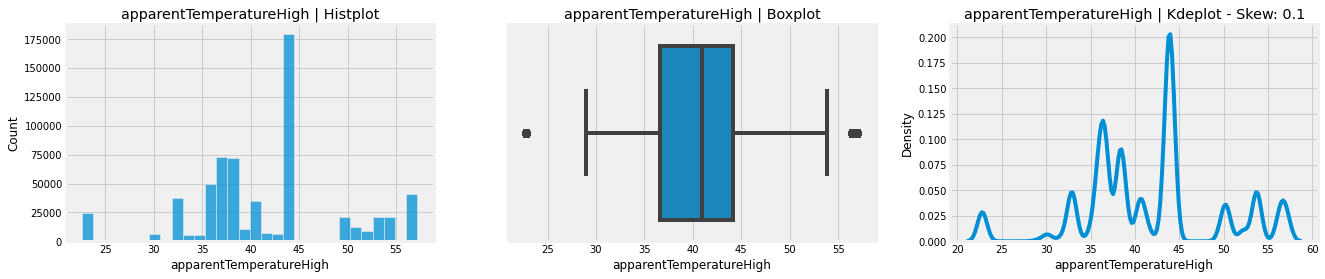

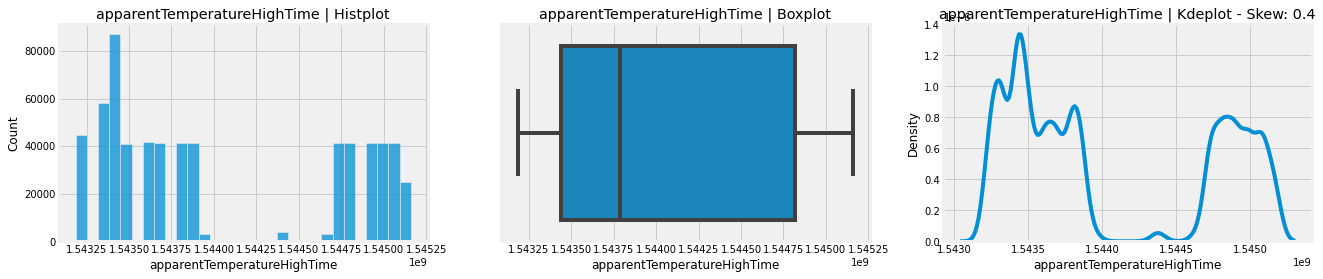

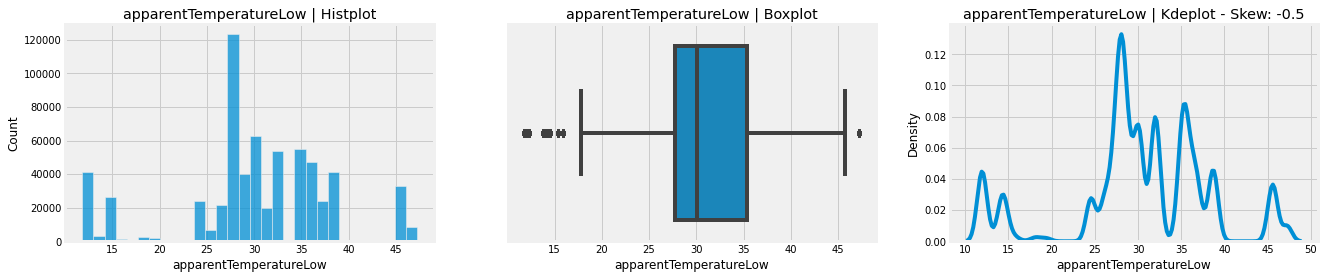

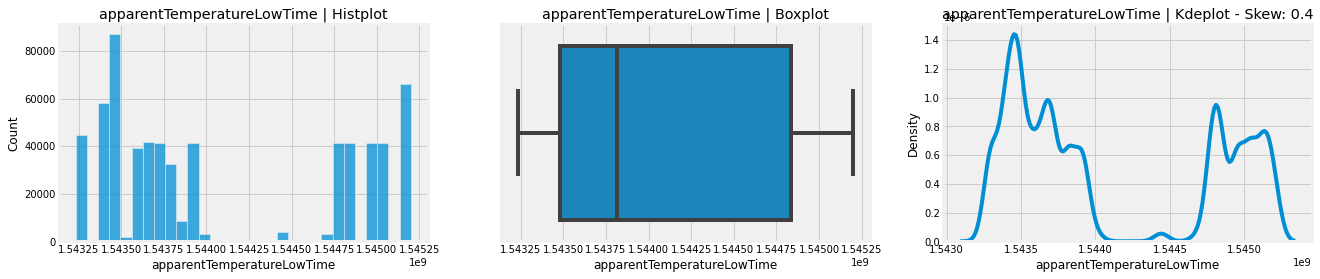

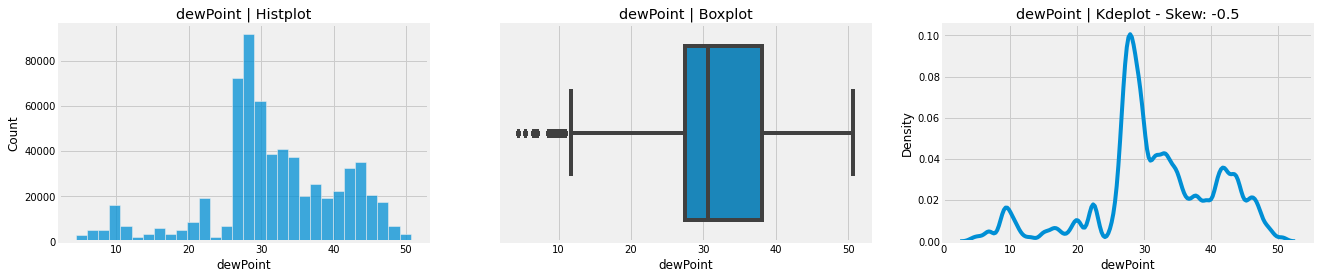

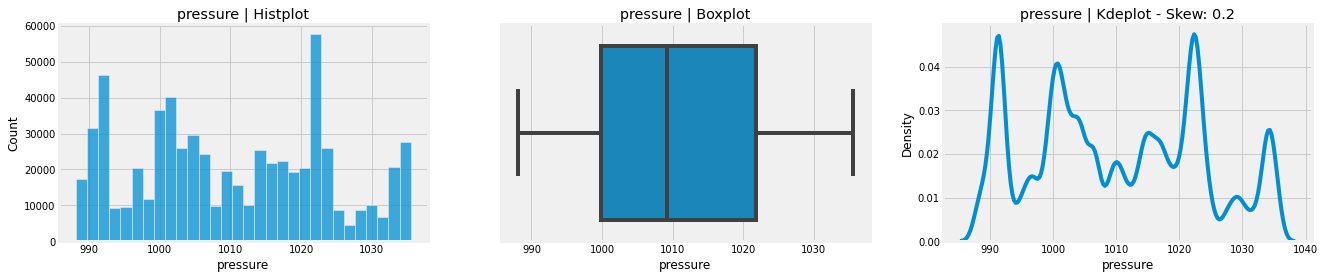

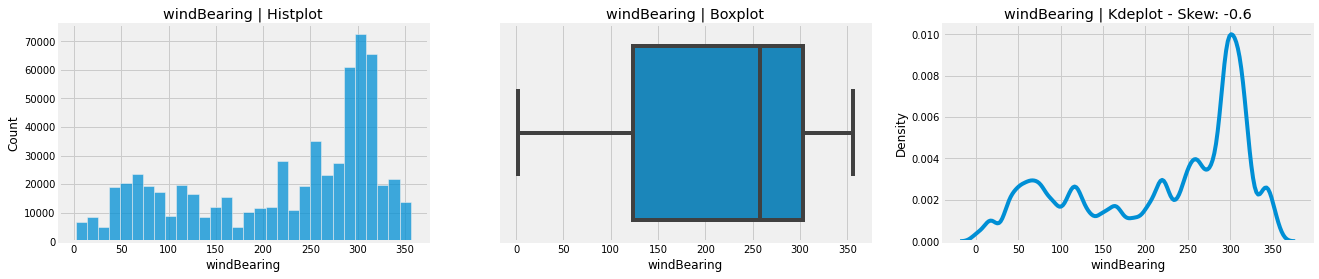

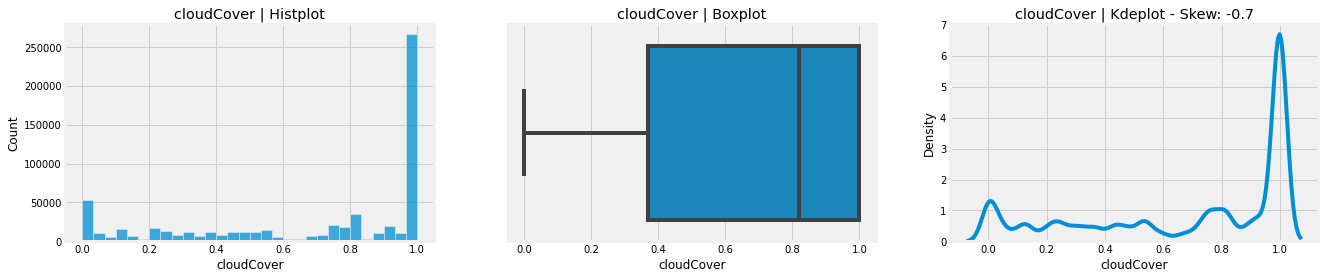

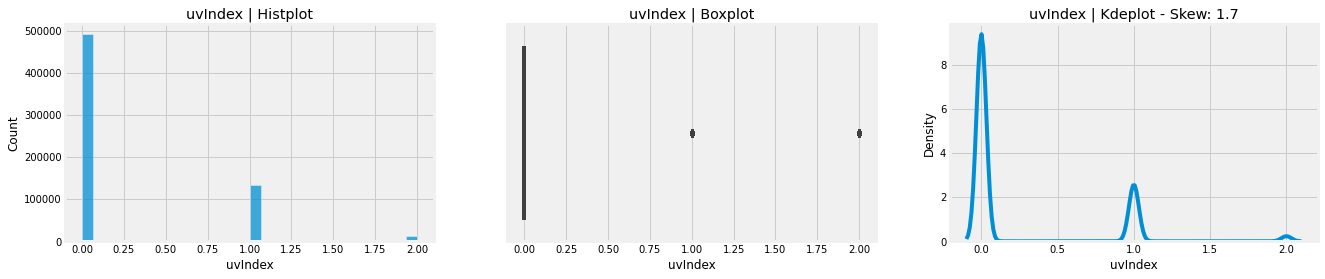

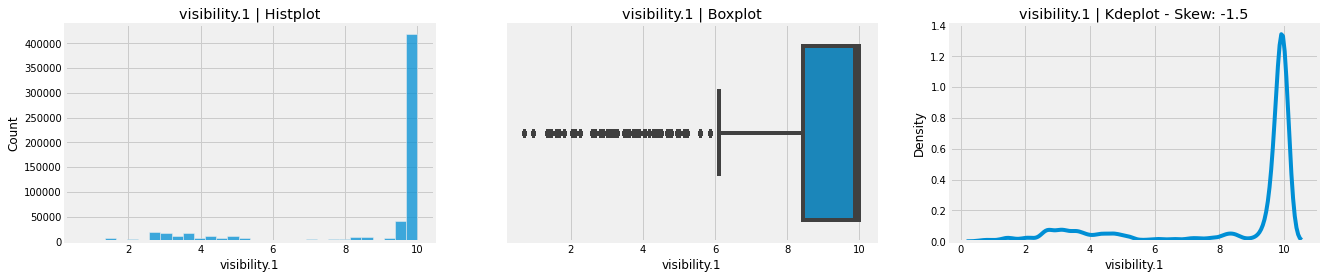

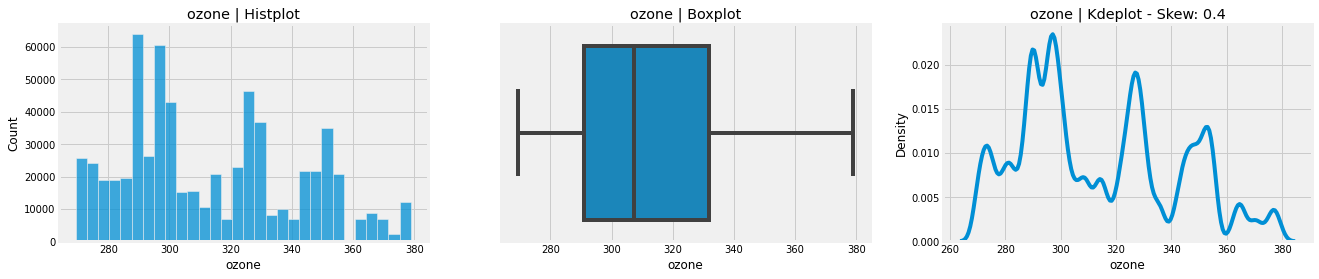

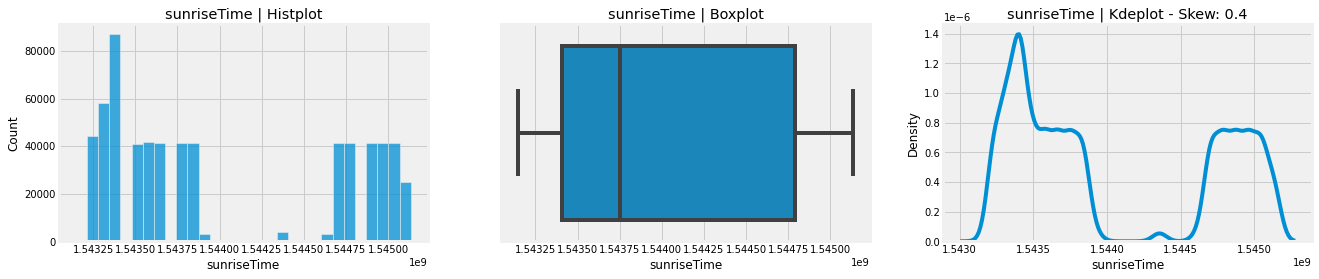

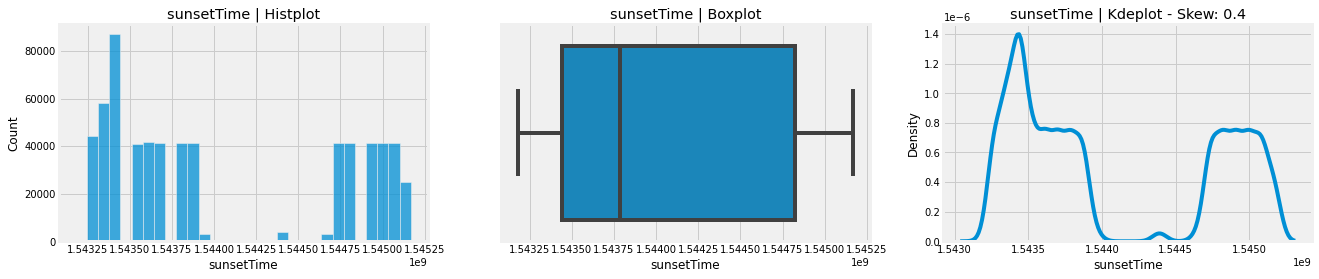

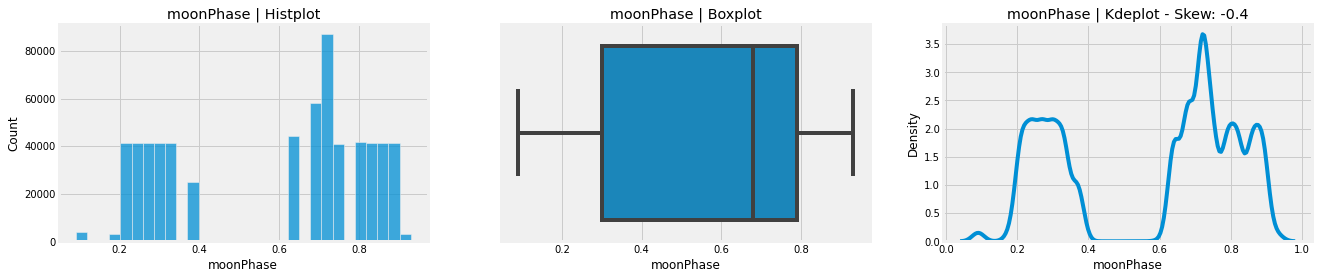

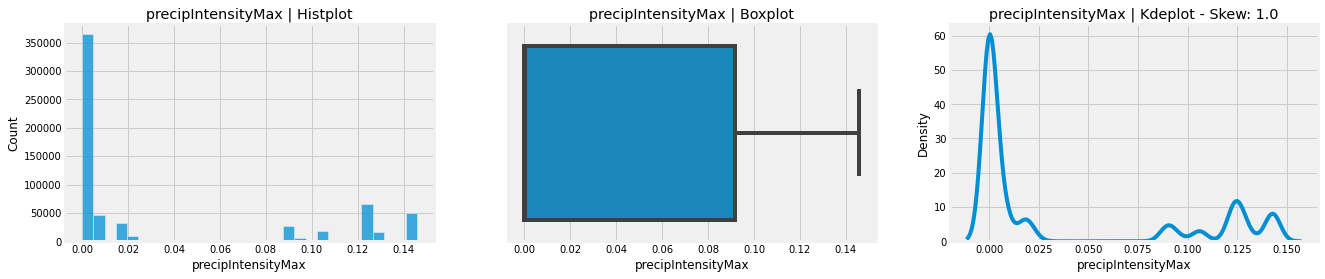

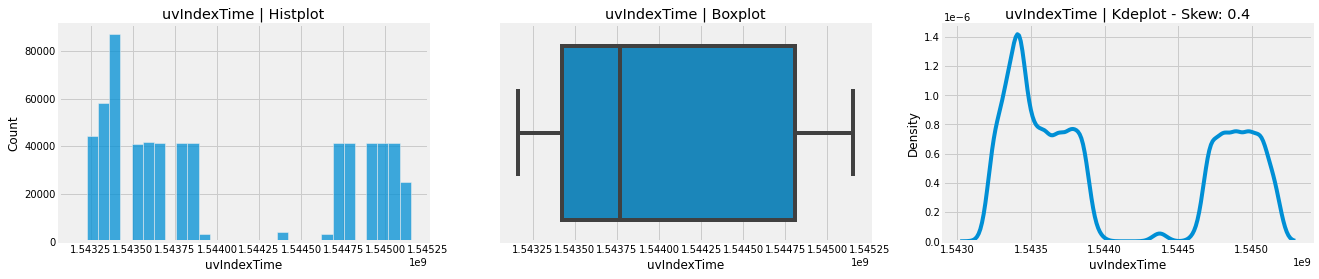

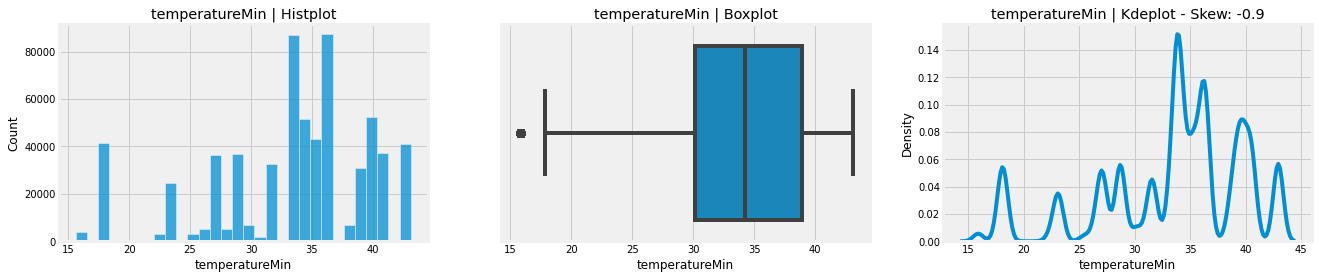

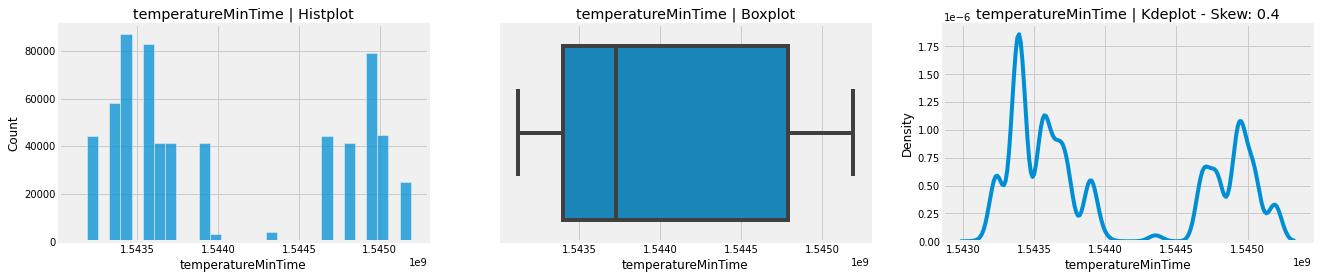

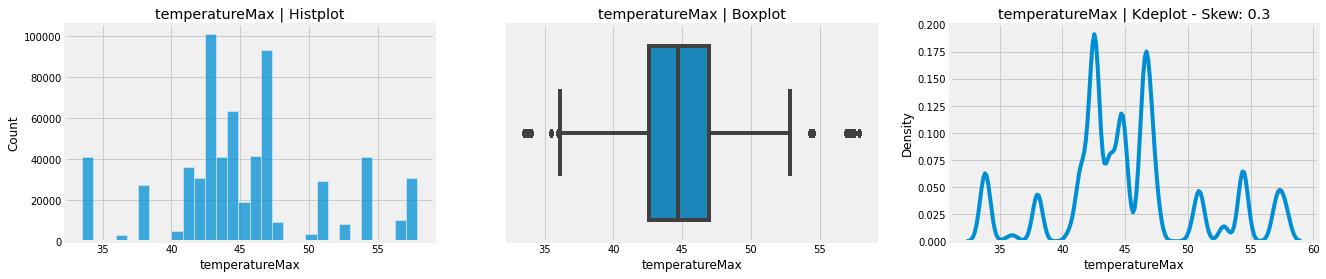

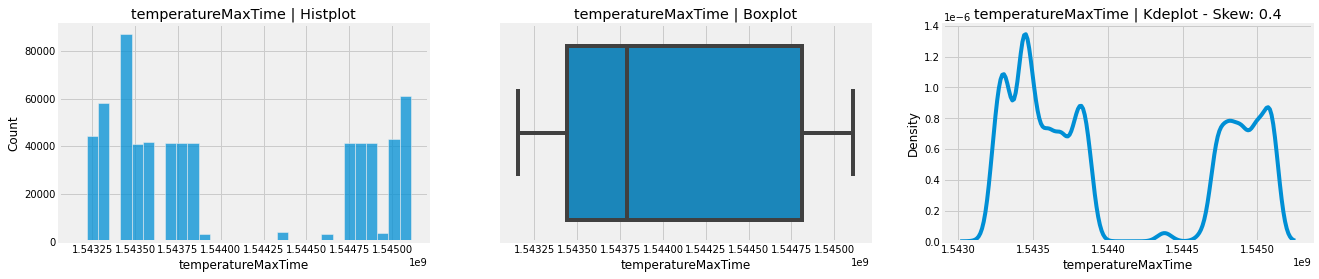

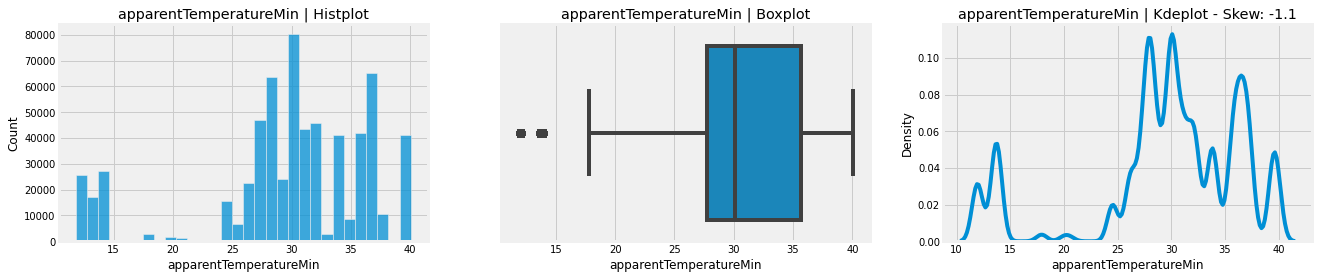

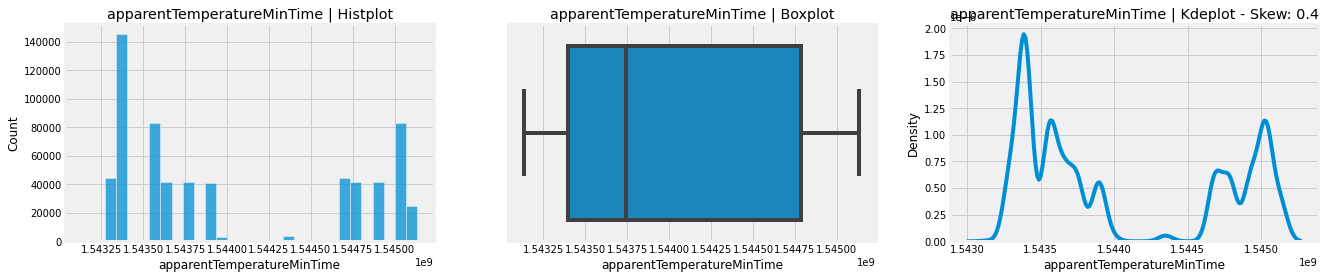

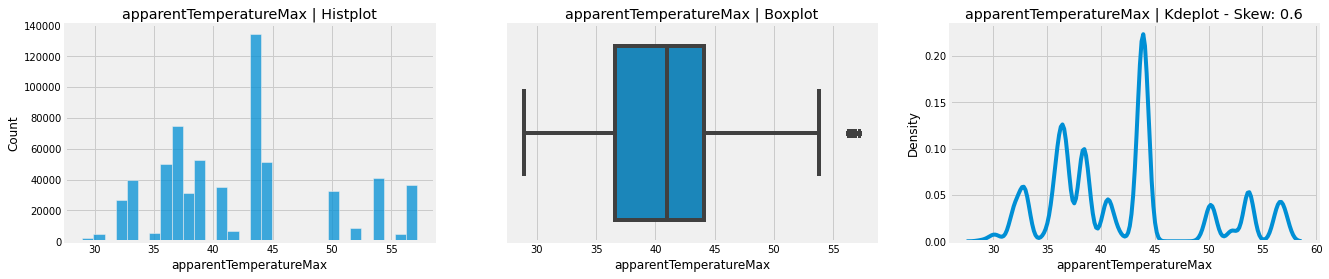

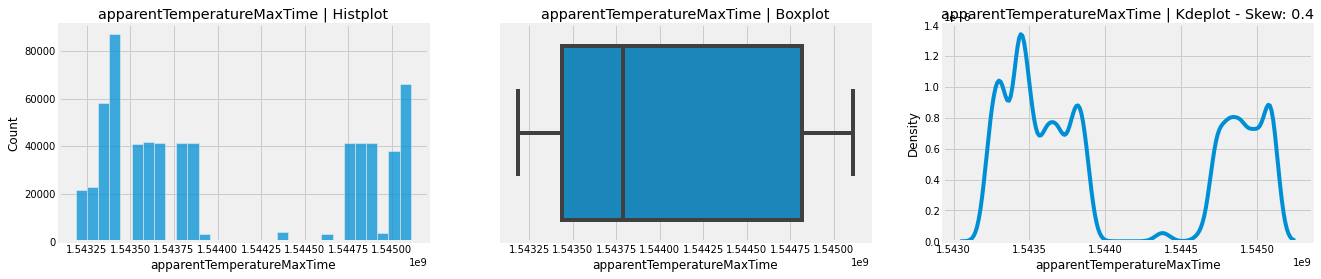

In [25]:
'''
Melihat jenis distribusi data dan outlier dari visualisasi fitur numerik yang 
ditampilkan

'''


for i in cab[num_feature].columns:
    fig, ax = plt.subplots(1, 3, figsize=(20,4))
    sns.histplot(x=cab[i],ax=ax[0], bins=30)
    sns.boxplot(x=cab[i], ax=ax[1])
    sns.kdeplot(cab[i], ax=ax[2])
    skew_val=round(cab[i].skew(), 1)
    ax[0].set_title(i + " | Histplot")
    ax[1].set_title(i + " | Boxplot")
    ax[2].set_title(i + " | Kdeplot - Skew: "+str(skew_val))
    plt.show()



*   Visualisasi distribusi data fitur numerik menunjukkan bahwa kolom **surge_multiplier**, **precipIntensity**, **precipProbability**, **visibility**, **cloudCover**, **visibility.1**, **precipIntensityMax** memiliki distribusi yang sangat miring (skewed), sedangkan yang kolom lain tampaknya memiliki distribusi data normal atau bimodel


*   Terlihat juga dari hasil visualisasi bahwa terdapat beberapa variabel yang mengandung outlier



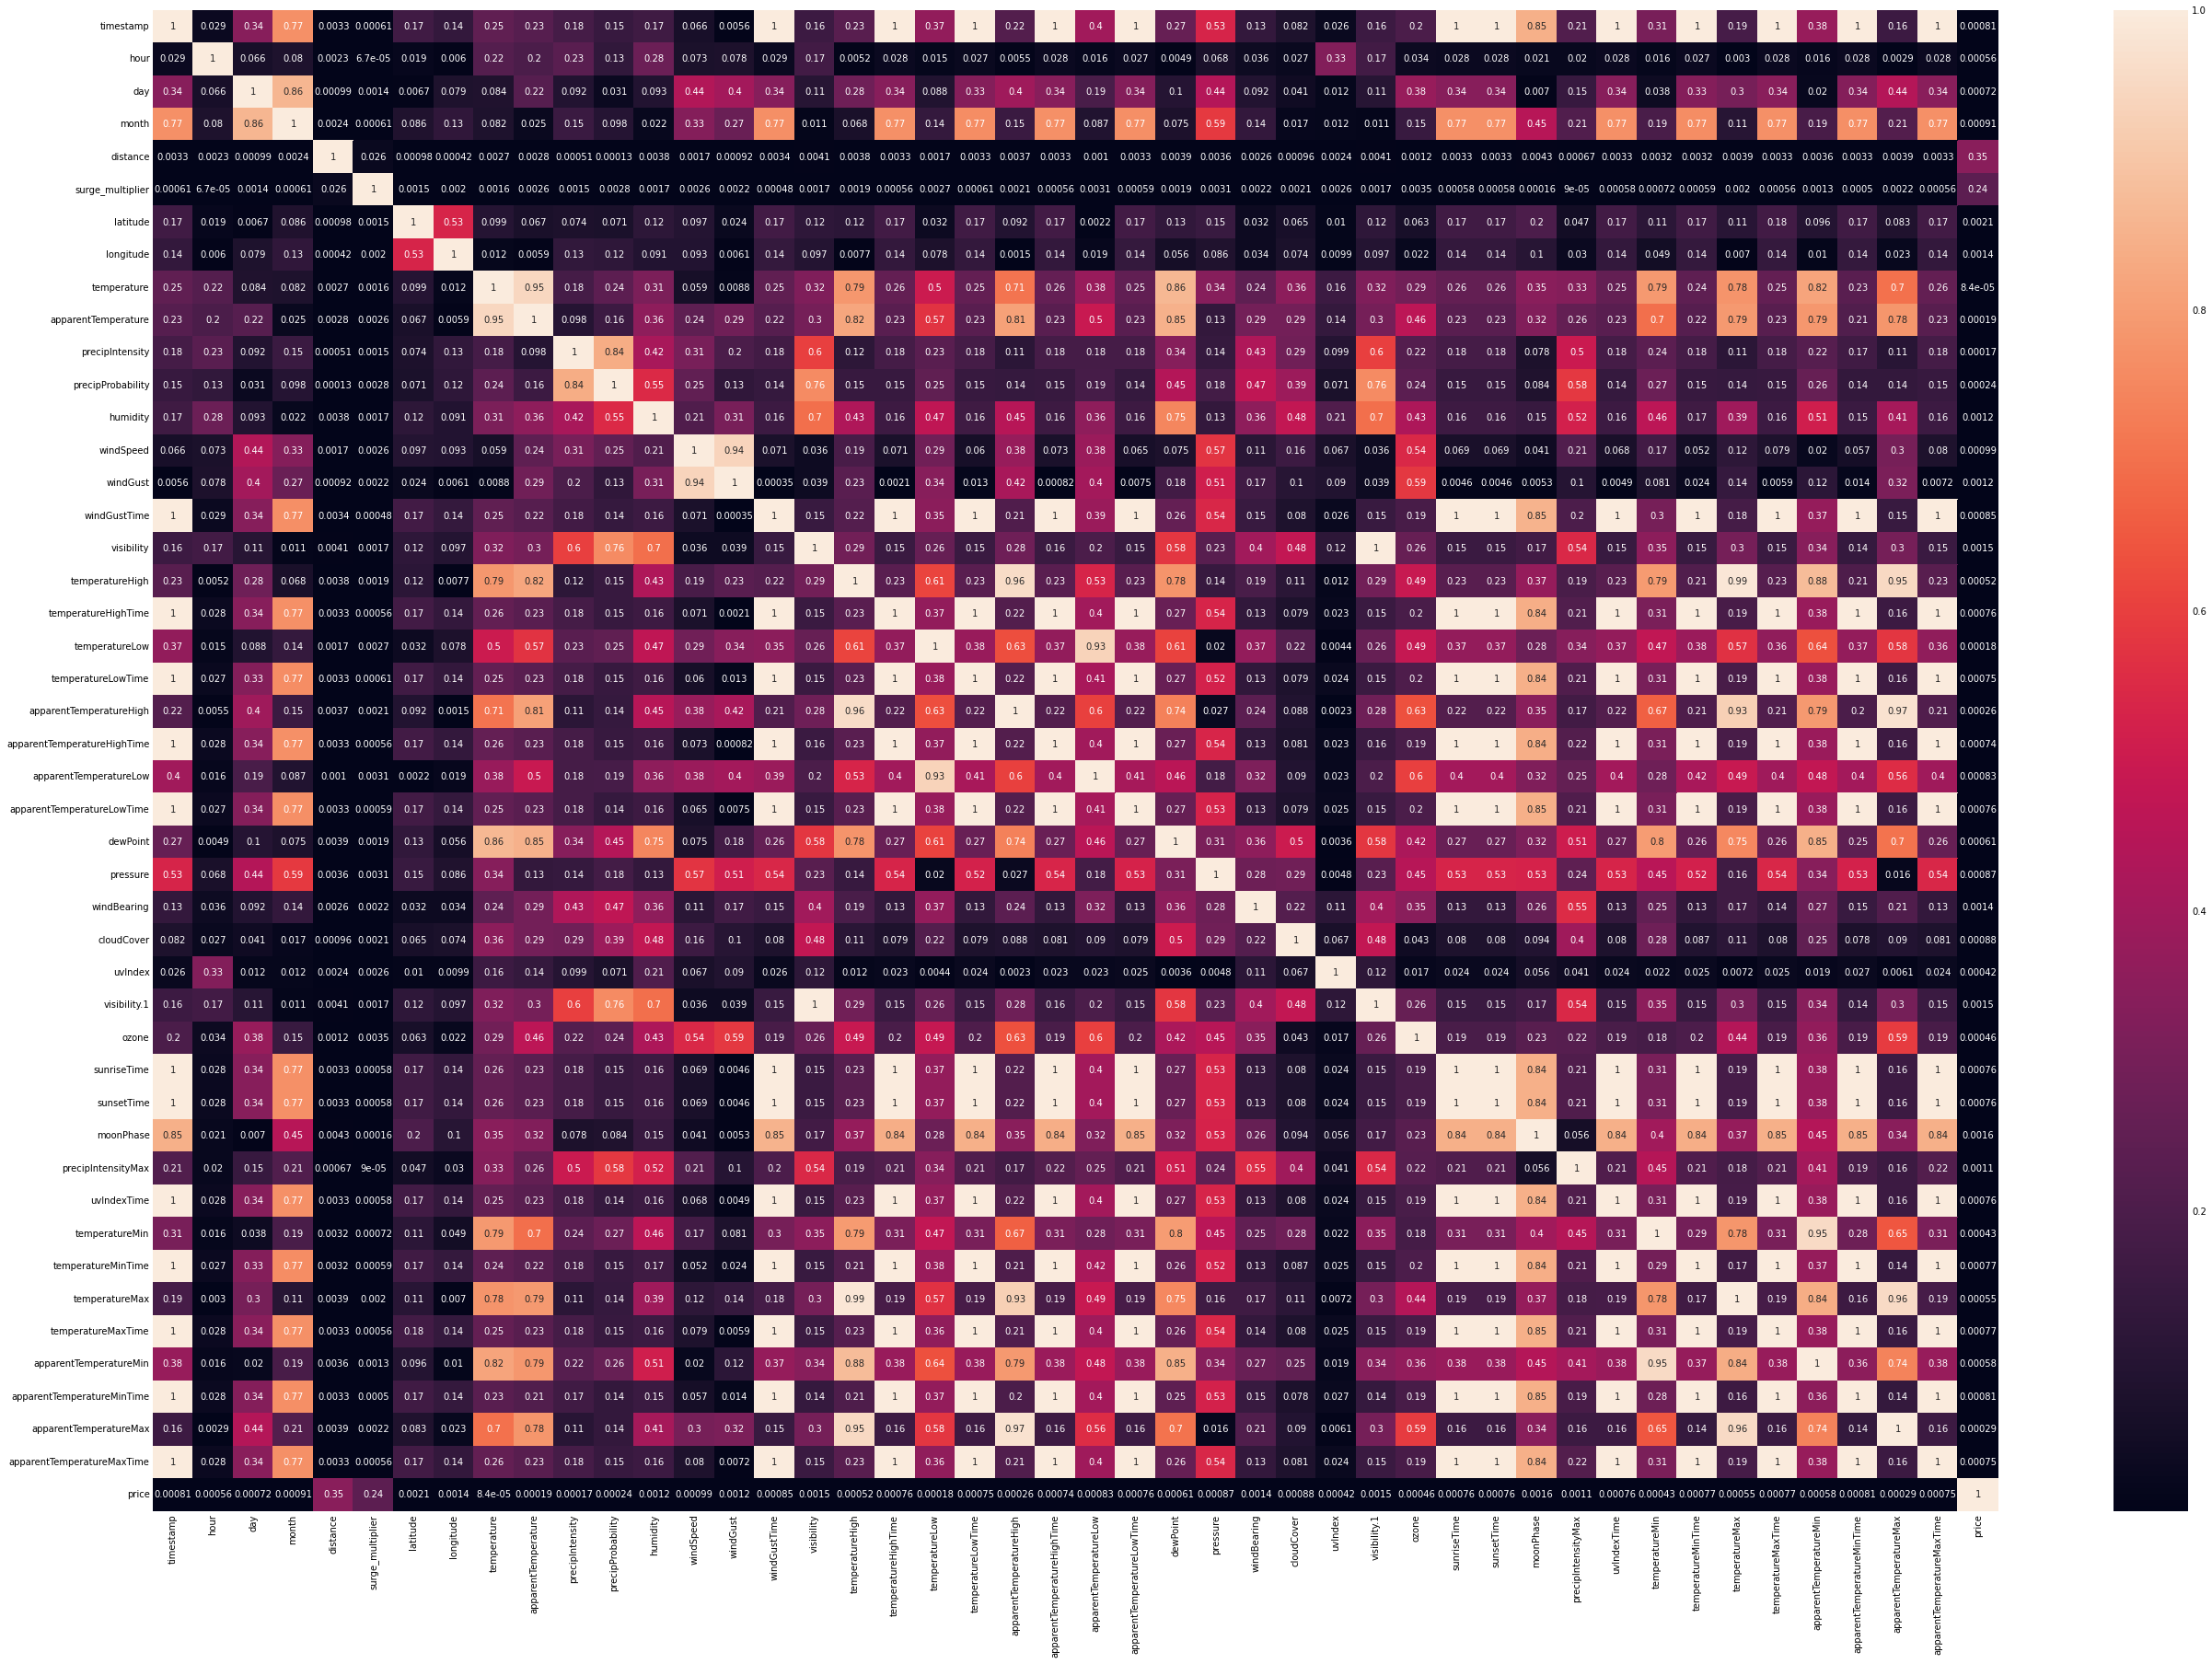

In [26]:
'''
Heatmap untuk pengecekan correlation fitur numerik terhadap taget

'''

plt.figure(figsize=(40, 30))
sns.heatmap(cab[num_feature+target].corr().abs(),  annot=True)
plt.show()


*   Dari matriks korelasi, terlihat bahwa **windGustTime** dan kolom yang mengandung kata '+time', ozone dan moonPhase adalah fitur yang sangat berkorelasi
*   Dari matrik korelasi, terlihat bahwa **temperature** dan kolom yang mengandung kata '+temperature' adalah fitur yang sangat berkorelasi

**Kolom distance dan surge_multiplier memiliki skor korelasi yang cukup dengan price dan merupakan indikasi yang baik untuk digunakan sebagai prediktor**

Dari hasil heatmap terdapat beberapa variabel dengan nilai korelasi tertinggi terhadap price:

*   distance 0.35
*   surge_multiplier 0.24
*   visibility 0.0015
*   visibility.1 0.0015
*   windBearing 0.0014
*   windGust 0.0012
*   humidity 0.0012
*   precipIntensityMax 0.0011











#6. PREPROCESSING DATA

###6.1 HANDLING OUTLIER

Saya memutuskan untuk handling outlier menggunakan trimming jika presentase outliernya sama dengan atau dibawah 3% dan menggunakn capping jika presentase outliernya diatas 3%.

**Saya menetapkan presentase outlier pada trimming sangat kecil dikarenakan semakin besar presentase data yang dipangkas akan berpengaruh pada performansi model yang dihasilkan.**

In [27]:
'''
Dari hasil visualiasi outlier tampaknya terdapat cukup banyak outlier pada
beberapa variabel yang ada pada fitur numerik.

Menampilkan presentasi outlier pada variabel yang ada pada fitur numerik.

'''
 
for k, v in cab[num_feature].items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  irq = q3 - q1
  v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(cab[num_feature])[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column timestamp outliers = 0.00%
Column hour outliers = 0.00%
Column day outliers = 0.00%
Column month outliers = 0.00%
Column distance outliers = 1.09%
Column surge_multiplier outliers = 100.00%
Column latitude outliers = 12.79%
Column longitude outliers = 0.00%
Column temperature outliers = 5.29%
Column apparentTemperature outliers = 7.71%
Column precipIntensity outliers = 100.00%
Column precipProbability outliers = 100.00%
Column humidity outliers = 0.00%
Column windSpeed outliers = 0.00%
Column windGust outliers = 2.43%
Column windGustTime outliers = 0.00%
Column visibility outliers = 19.73%
Column temperatureHigh outliers = 23.64%
Column temperatureHighTime outliers = 0.00%
Column temperatureLow outliers = 0.00%
Column temperatureLowTime outliers = 0.00%
Column apparentTemperatureHigh outliers = 10.33%
Column apparentTemperatureHighTime outliers = 0.00%
Column apparentTemperatureLow outliers = 12.65%
Column apparentTemperatureLowTime outliers = 0.00%
Column dewPoint outliers = 5.

####6.1.1 HANDLING OUTLIER USING CAPPING

**Saya menggunakan capping untuk menghandle variabel yang mengandung outlier dengan presentase outlier diatas 3%**


*   surge_multiplier outliers = 100.00%
*   precipIntensity outliers = 100.00%
*   precipProbability outliers = 100.00%
*   uvIndex outliers = 100.00%
*   latitude outliers = 12.78%
*   temperature outliers = 5.29%
*   apparentTemperature outliers = 7.72%
*   visibility outliers = 19.74%
*   temperatureHigh outliers = 23.65%
*   apparentTemperatureHigh outliers = 10.33%
*   apparentTemperatureLow outliers = 12.65%
*   dewPoint outliers = 5.38%
*   visibility.1 outliers = 19.74%
*   temperatureMax outliers = 19.77%
*   apparentTemperatureMin outliers = 10.97%
*   apparentTemperatureMax outliers = 6.46%

In [28]:
!pip install feature-engine
from feature_engine.outliers import Winsorizer

# Create the capper

windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['surge_multiplier', 'precipIntensity', 'precipProbability', 'uvIndex', 'latitude', 'temperature', 'apparentTemperature', 'visibility', 'temperatureHigh', 'apparentTemperatureHigh', 'apparentTemperatureLow', 'dewPoint', 'visibility.1', 'temperatureMax', 'apparentTemperatureMin', 'apparentTemperatureMax'])

windsoriser.fit(cab)

cab_t = windsoriser.transform(cab)

In [29]:
# Inspect the minimum caps for each variable
print('Left Tail Caps  : ', windsoriser.left_tail_caps_)

# Iinspect the maximum caps for each variable
print('Right Tail Caps : ', windsoriser.right_tail_caps_)

Left Tail Caps  :  {'surge_multiplier': 1.0, 'precipIntensity': 0.0, 'precipProbability': 0.0, 'uvIndex': 0.0, 'latitude': 42.3287, 'temperature': 25.75500000000001, 'apparentTemperature': 19.760000000000005, 'visibility': 6.086, 'temperatureHigh': 36.06, 'apparentTemperatureHigh': 25.245000000000005, 'apparentTemperatureLow': 16.269999999999996, 'dewPoint': 11.545, 'visibility.1': 6.086, 'temperatureMax': 36.06, 'apparentTemperatureMin': 15.835000000000003, 'apparentTemperatureMax': 25.245000000000005}
Right Tail Caps :  {'surge_multiplier': 1.0, 'precipIntensity': 0.0, 'precipProbability': 0.0, 'uvIndex': 0.0, 'latitude': 42.386300000000006, 'temperature': 54.27499999999999, 'apparentTemperature': 52.16, 'visibility': 12.342, 'temperatureHigh': 53.41999999999999, 'apparentTemperatureHigh': 55.44499999999999, 'apparentTemperatureLow': 46.75, 'dewPoint': 54.065, 'visibility.1': 12.342, 'temperatureMax': 53.41999999999999, 'apparentTemperatureMin': 47.635, 'apparentTemperatureMax': 55.4

In [30]:
print('Numerik Fitur Dataframe - Before Capping')
print(cab.describe())
print('')
print('Numerik Fitur Dataframe - After Capping')
print(cab_t.describe())

Numerik Fitur Dataframe - Before Capping
          timestamp  ...  apparentTemperatureMaxTime
count  6.379760e+05  ...                6.379760e+05
mean   1.544046e+09  ...                1.544048e+09
std    6.892028e+05  ...                6.911036e+05
min    1.543204e+09  ...                1.543187e+09
25%    1.543444e+09  ...                1.543439e+09
50%    1.543737e+09  ...                1.543788e+09
75%    1.544828e+09  ...                1.544818e+09
max    1.545161e+09  ...                1.545109e+09

[8 rows x 46 columns]

Numerik Fitur Dataframe - After Capping
          timestamp  ...  apparentTemperatureMaxTime
count  6.379760e+05  ...                6.379760e+05
mean   1.544046e+09  ...                1.544048e+09
std    6.892028e+05  ...                6.911036e+05
min    1.543204e+09  ...                1.543187e+09
25%    1.543444e+09  ...                1.543439e+09
50%    1.543737e+09  ...                1.543788e+09
75%    1.544828e+09  ...                1.54481

In [31]:
# Function to create histogram and boxplot.
# Function takes a dataframe (df) and the variable of interest as arguments

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

Surge Multiplier - Before Capping


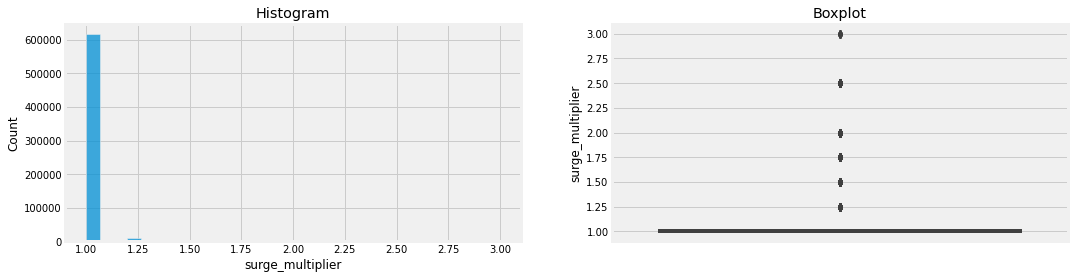

\Surge Multiplier - After Capping


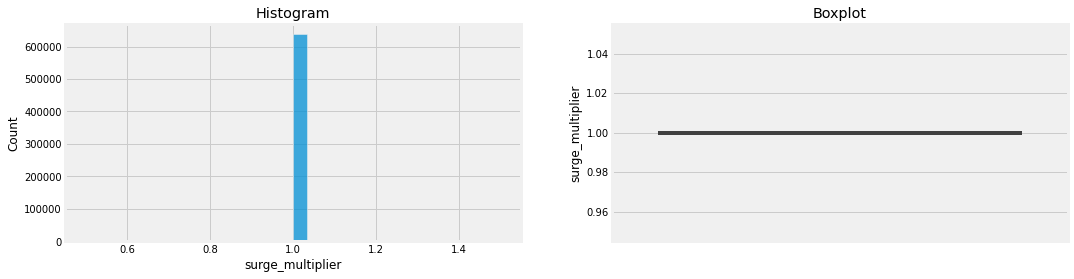

Precip Intensity - Before Capping


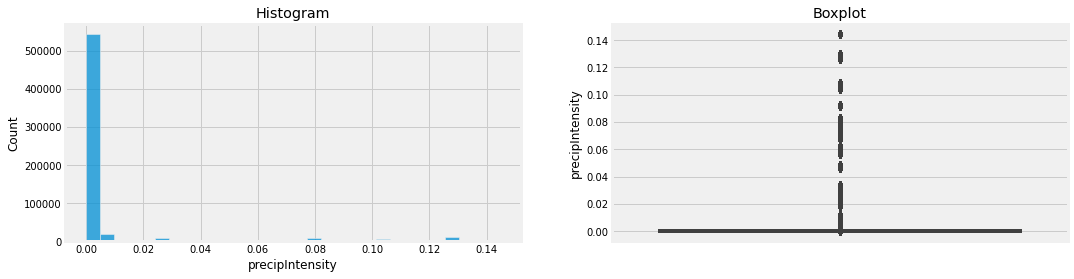

\Precip Intensity - After Capping


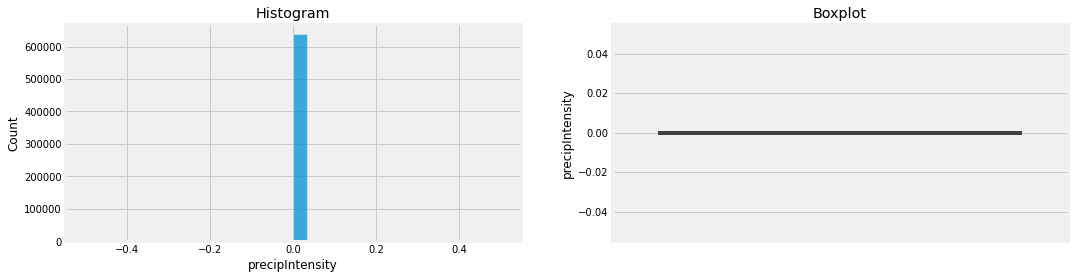

Precip Probability - Before Capping


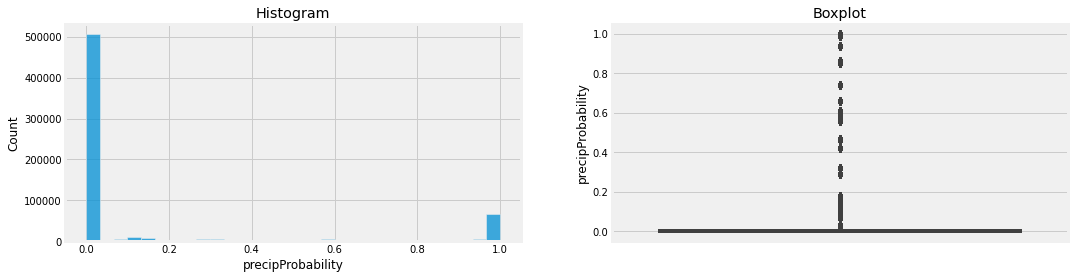

\Precip Probability - After Capping


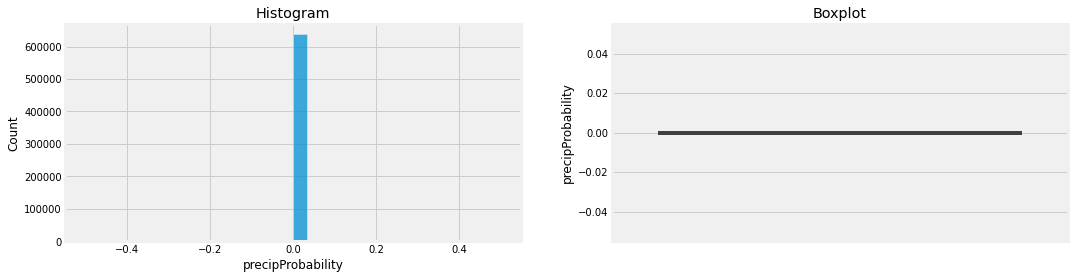

Index - Before Capping


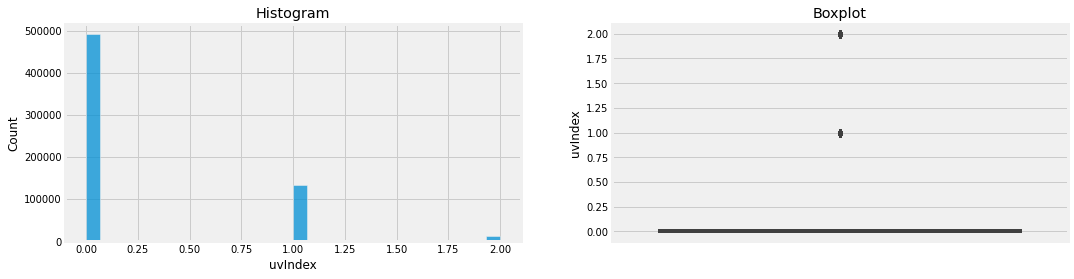

\Index - After Capping


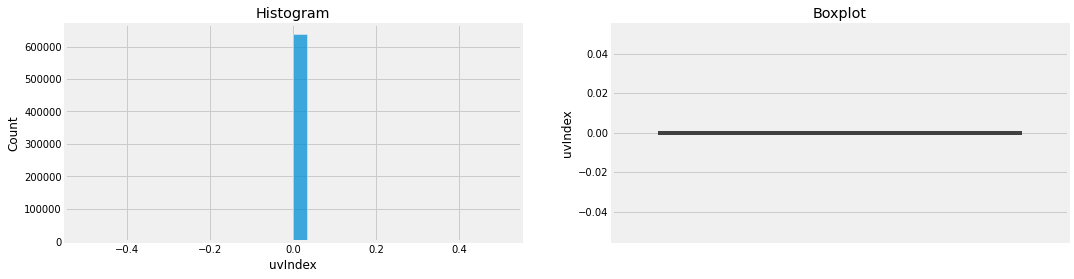

Latitude - Before Capping


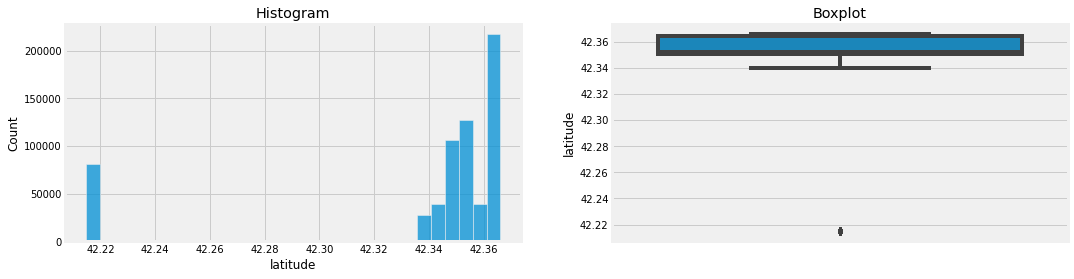

\Latitude - After Capping


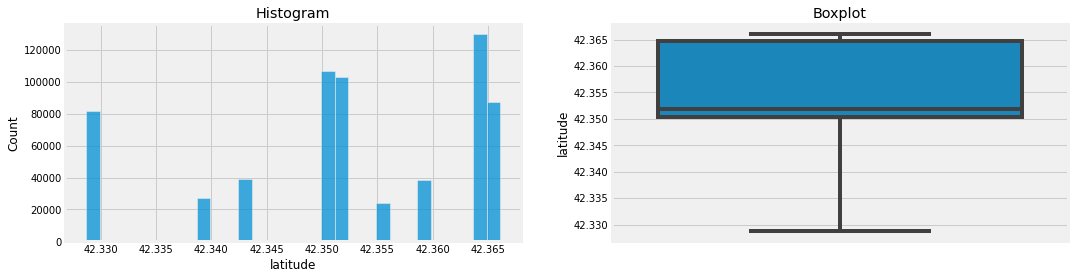

Temperature - Before Capping


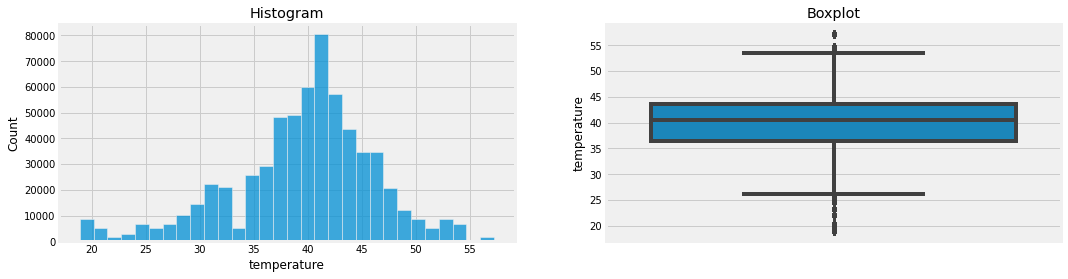

\Temperature - After Capping


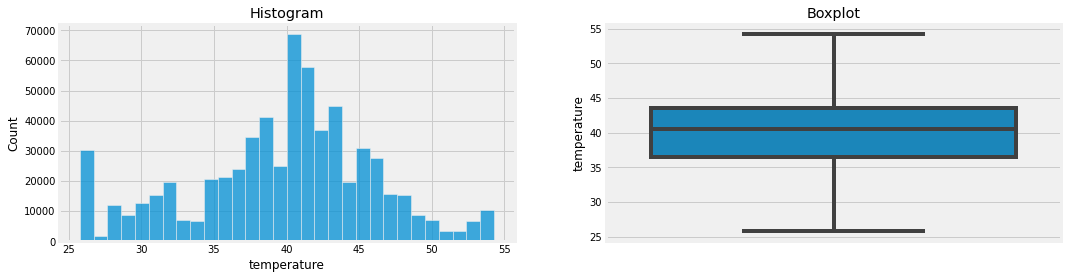

Apparent Temperature - Before Capping


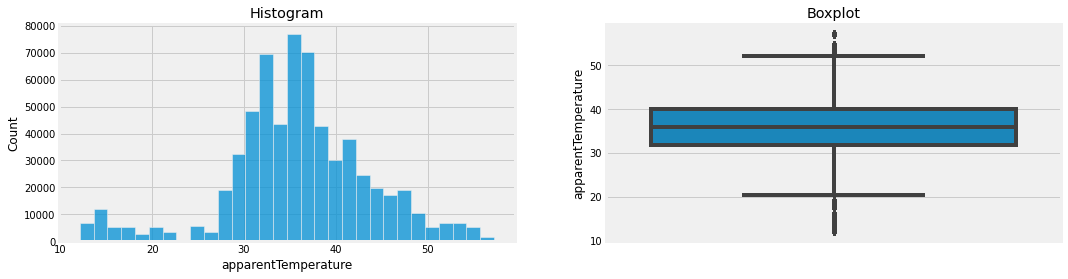

\Apparent Temperature - After Capping


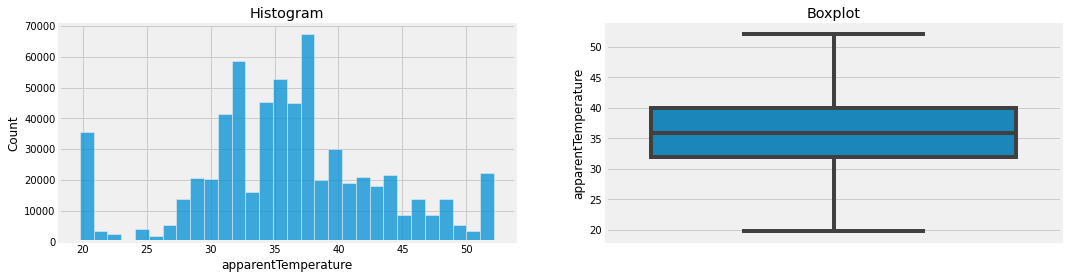

Apparent Temperature - Before Capping


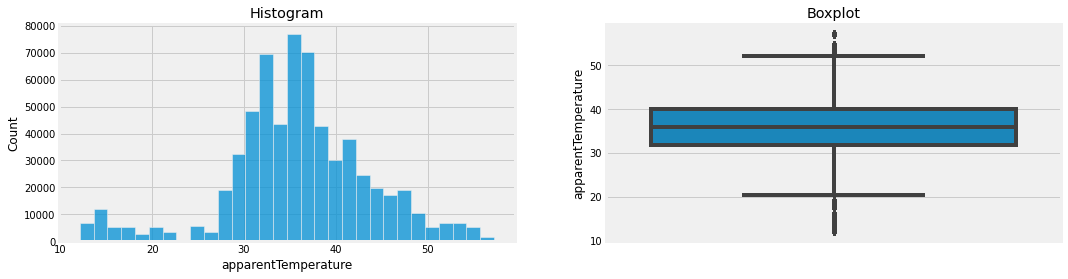

\Apparent Temperature - After Capping


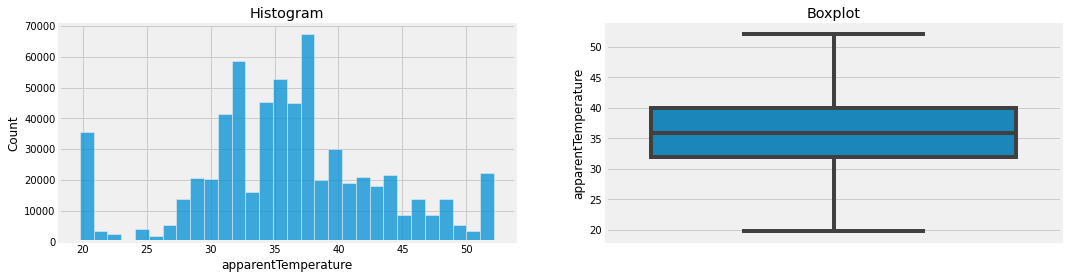

Visibility - Before Capping


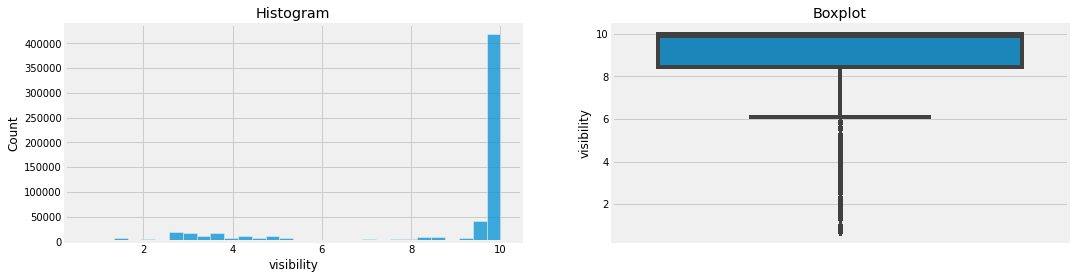

\Visibility - After Capping


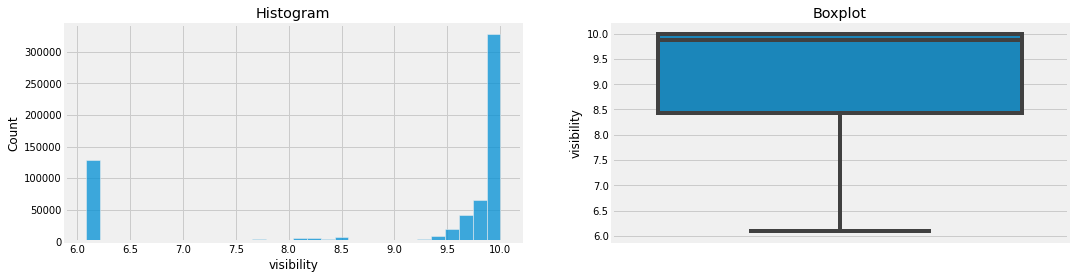

Temperature High - Before Capping


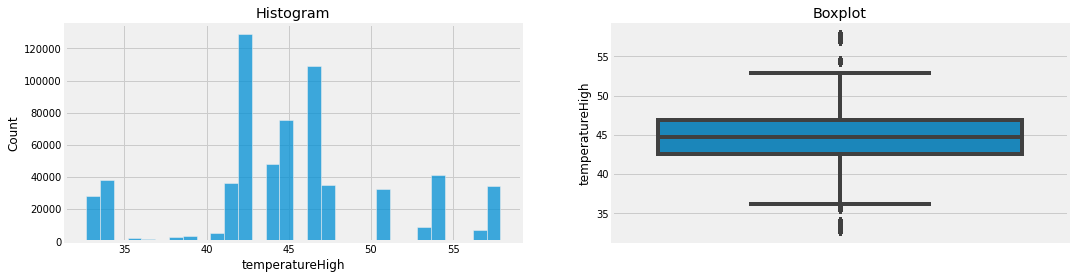

\Temperature High - After Capping


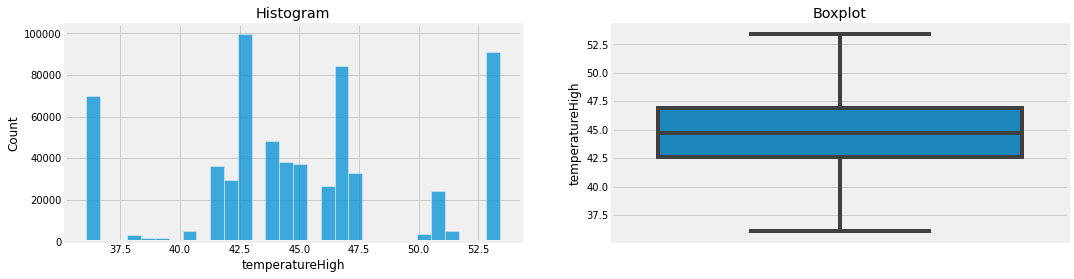

Apparent Temperature High - Before Capping


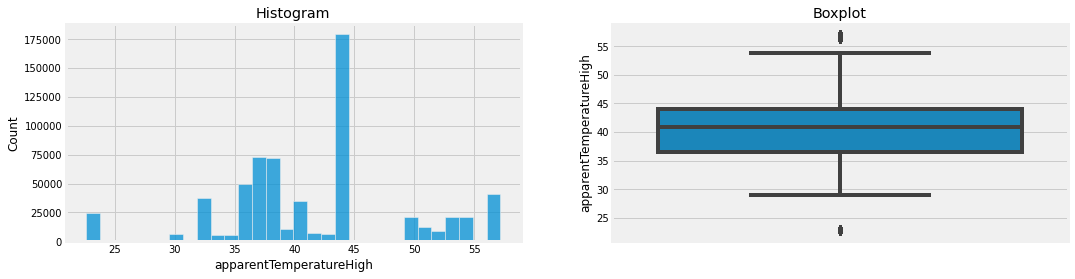

\Apparent Temperature High - After Capping


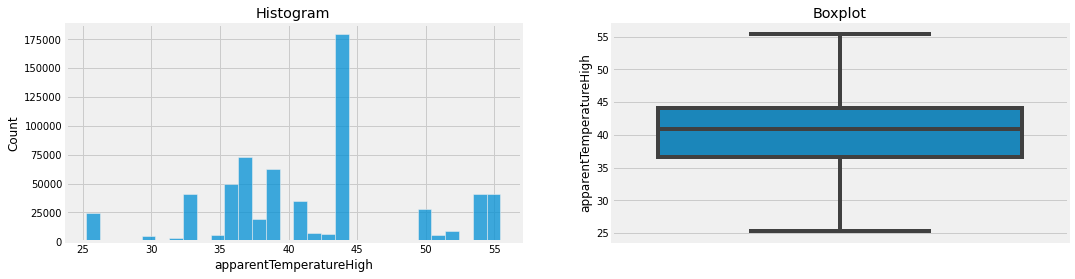

Apparent Temperature Low - Before Capping


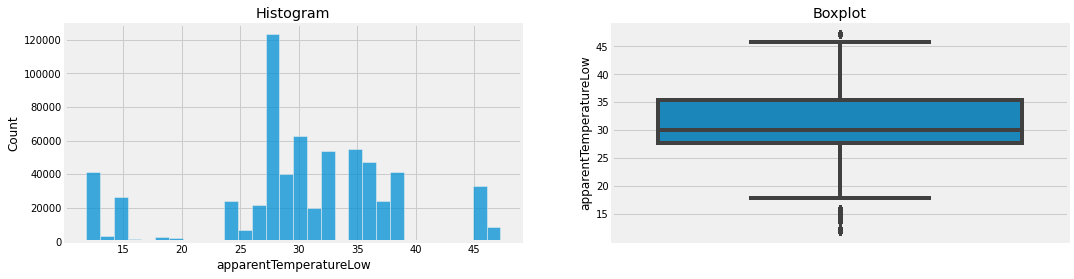

\Apparent Temperature Low - After Capping


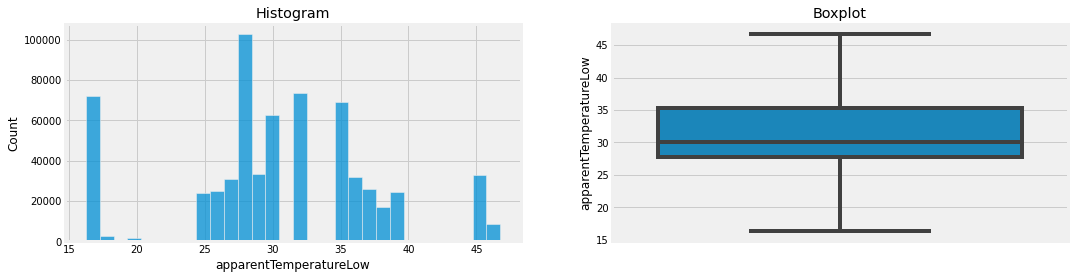

Dew Point - Before Capping


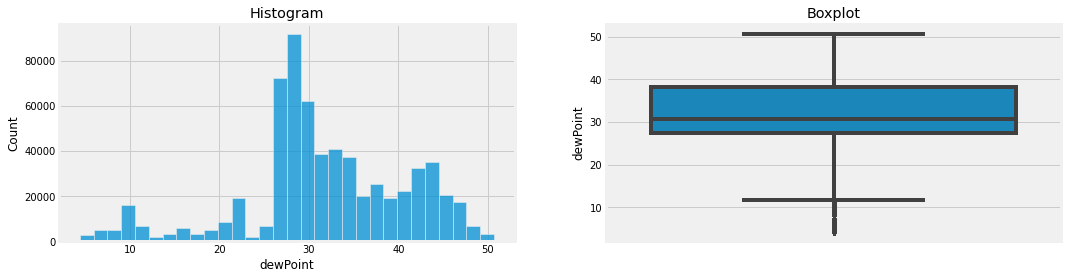

\Dew Point - After Capping


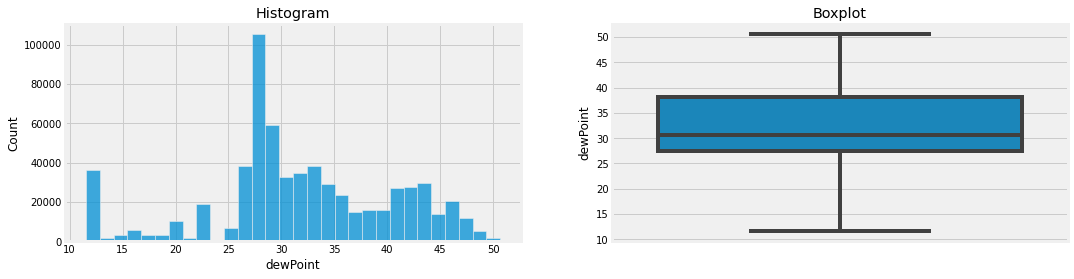

Visibility.1 - Before Capping


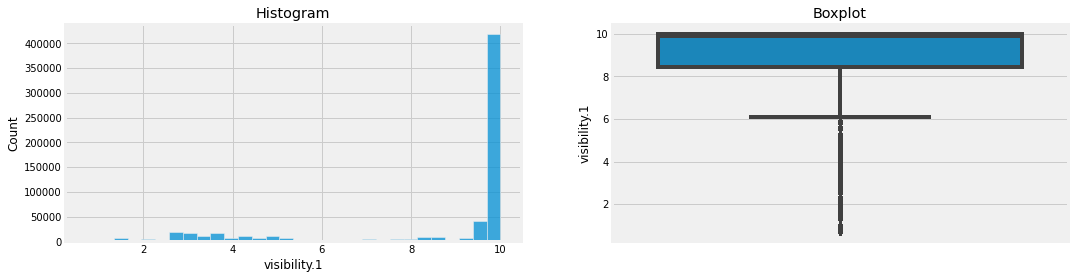

\Visibility.1 - After Capping


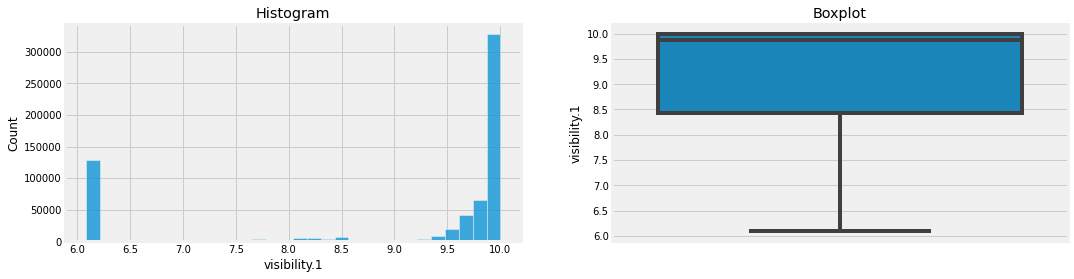

Temperature Max - Before Capping


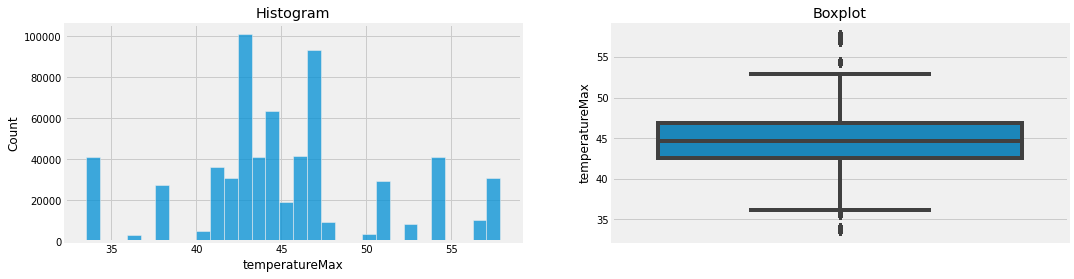

\Temperature Max - After Capping


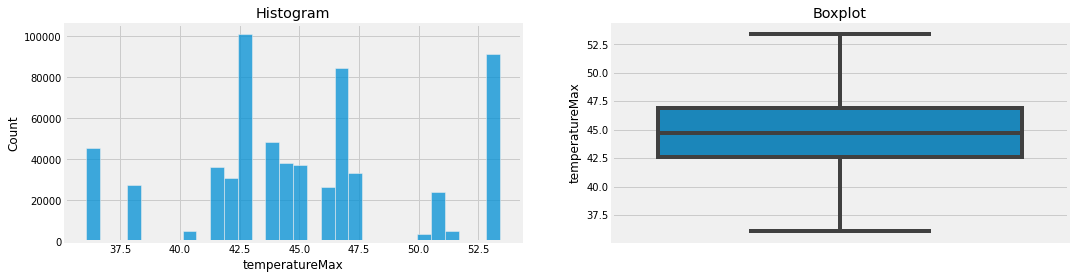

Apparent Temperature Min - Before Capping


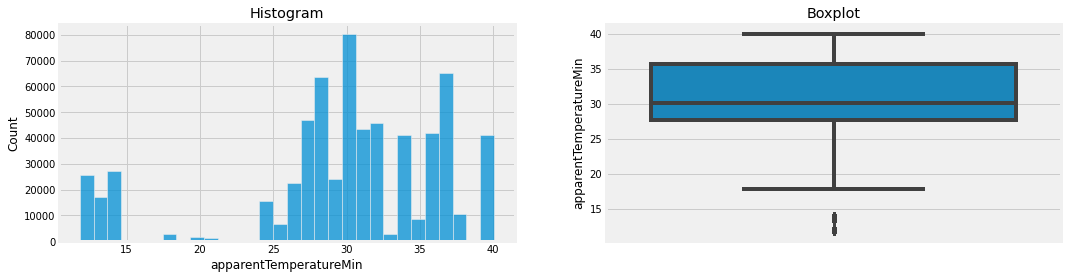

\Apparent Temperature Min - After Capping


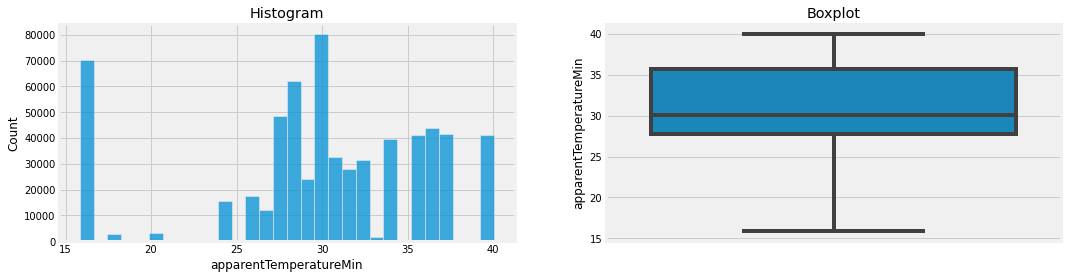

Apparent Temperature Max - Before Capping


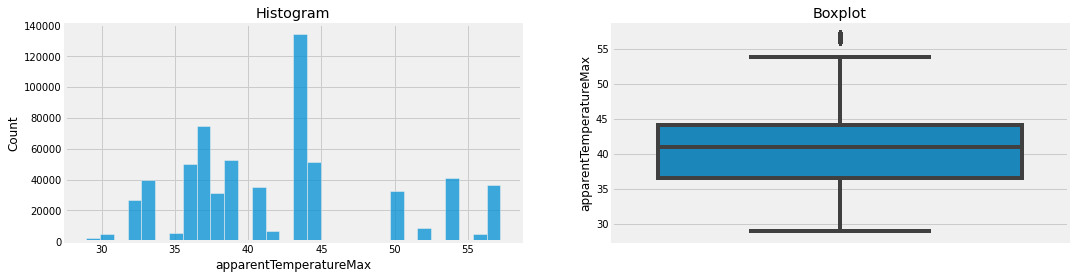

\Apparent Temperature Max - After Capping


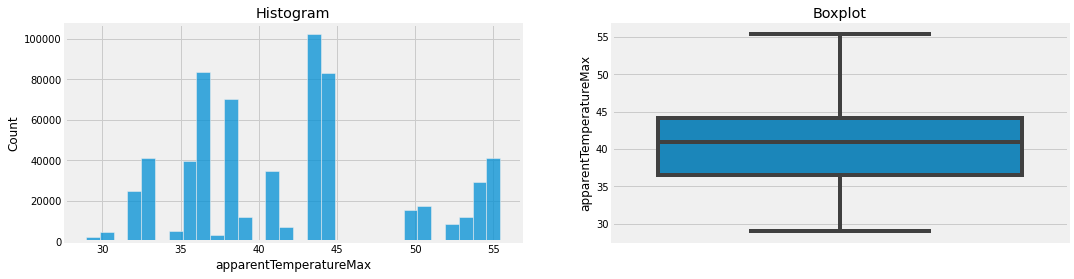

In [32]:
print('Surge Multiplier - Before Capping')
diagnostic_plots(cab, 'surge_multiplier')
print('\Surge Multiplier - After Capping')
diagnostic_plots(cab_t, 'surge_multiplier')

print('Precip Intensity - Before Capping')
diagnostic_plots(cab, 'precipIntensity')
print('\Precip Intensity - After Capping')
diagnostic_plots(cab_t, 'precipIntensity')

print('Precip Probability - Before Capping')
diagnostic_plots(cab, 'precipProbability')
print('\Precip Probability - After Capping')
diagnostic_plots(cab_t, 'precipProbability')

print('Index - Before Capping')
diagnostic_plots(cab, 'uvIndex')
print('\Index - After Capping')
diagnostic_plots(cab_t, 'uvIndex')

print('Latitude - Before Capping')
diagnostic_plots(cab, 'latitude')
print('\Latitude - After Capping')
diagnostic_plots(cab_t, 'latitude')

print('Temperature - Before Capping')
diagnostic_plots(cab, 'temperature')
print('\Temperature - After Capping')
diagnostic_plots(cab_t, 'temperature')

print('Apparent Temperature - Before Capping')
diagnostic_plots(cab, 'apparentTemperature')
print('\Apparent Temperature - After Capping')
diagnostic_plots(cab_t, 'apparentTemperature')

print('Apparent Temperature - Before Capping')
diagnostic_plots(cab, 'apparentTemperature')
print('\Apparent Temperature - After Capping')
diagnostic_plots(cab_t, 'apparentTemperature')

print('Visibility - Before Capping')
diagnostic_plots(cab, 'visibility')
print('\Visibility - After Capping')
diagnostic_plots(cab_t, 'visibility')

print('Temperature High - Before Capping')
diagnostic_plots(cab, 'temperatureHigh')
print('\Temperature High - After Capping')
diagnostic_plots(cab_t, 'temperatureHigh')

print('Apparent Temperature High - Before Capping')
diagnostic_plots(cab, 'apparentTemperatureHigh')
print('\Apparent Temperature High - After Capping')
diagnostic_plots(cab_t, 'apparentTemperatureHigh')

print('Apparent Temperature Low - Before Capping')
diagnostic_plots(cab, 'apparentTemperatureLow')
print('\Apparent Temperature Low - After Capping')
diagnostic_plots(cab_t, 'apparentTemperatureLow')

print('Dew Point - Before Capping')
diagnostic_plots(cab, 'dewPoint')
print('\Dew Point - After Capping')
diagnostic_plots(cab_t, 'dewPoint')

print('Visibility.1 - Before Capping')
diagnostic_plots(cab, 'visibility.1')
print('\Visibility.1 - After Capping')
diagnostic_plots(cab_t, 'visibility.1')

print('Temperature Max - Before Capping')
diagnostic_plots(cab, 'temperatureMax')
print('\Temperature Max - After Capping')
diagnostic_plots(cab_t, 'temperatureMax')

print('Apparent Temperature Min - Before Capping')
diagnostic_plots(cab, 'apparentTemperatureMin')
print('\Apparent Temperature Min - After Capping')
diagnostic_plots(cab_t, 'apparentTemperatureMin')

print('Apparent Temperature Max - Before Capping')
diagnostic_plots(cab, 'apparentTemperatureMax')
print('\Apparent Temperature Max - After Capping')
diagnostic_plots(cab_t, 'apparentTemperatureMax')

####6.1.2 HANDLING OUTLIER USING TRIMMING

**Saya menggunakan trimming untuk menghandle variabel yang mengandung outlier dengan presentase outlier sama dengan dan dibawah 3%**
*   distance outliers = 1.27%
*   windGust outliers = 2.43%
*   temperatureMin outliers = 0.64%







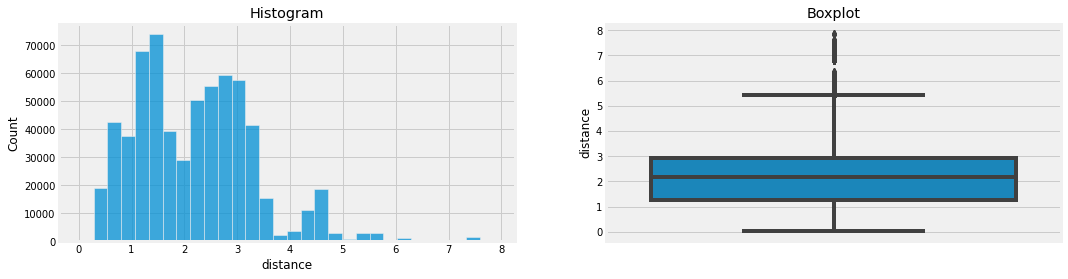

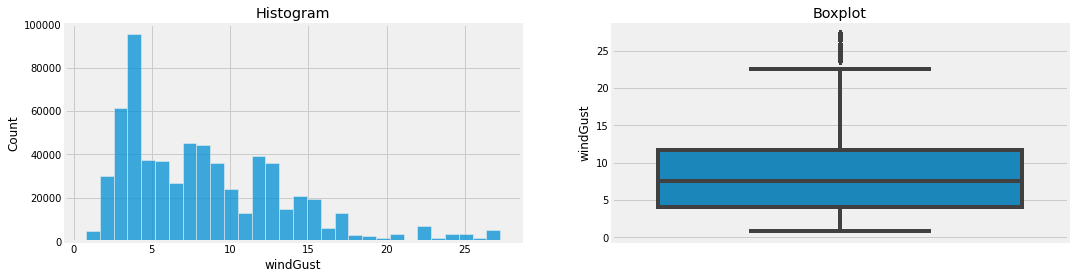

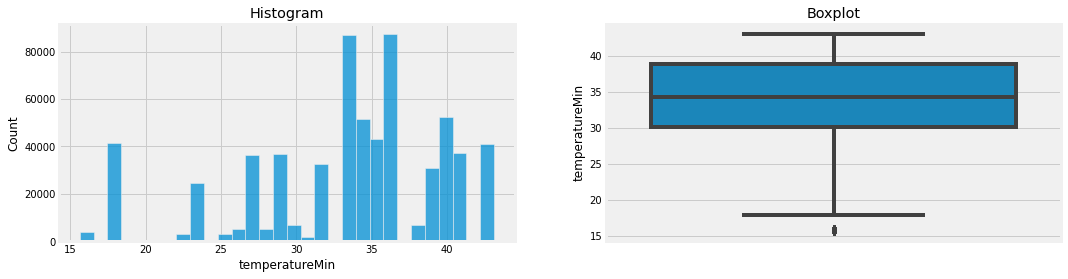

In [33]:
# Let's find outliers in `distance`, `windGust`, `temperatureMin`

diagnostic_plots(cab, 'distance')
diagnostic_plots(cab, 'windGust')
diagnostic_plots(cab, 'temperatureMin')

In [34]:
# Function to find upper and lower boundaries for skewed distributed variables
# Let's calculate the boundaries outside which sit the outliers for skewed distributions
# Distance passed as an argument, gives us the option to estimate 1.5 times or 3 times the IQR to calculate the boundaries.

def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [35]:
# Limits for `distance`
distance_upper_limit, distance_lower_limit = find_skewed_boundaries(cab, 'distance', 1.5)
distance_upper_limit, distance_lower_limit

# Limits for `windGust`
windGust_upper_limit, windGust_lower_limit = find_skewed_boundaries(cab, 'windGust', 1.5)
windGust_upper_limit, windGust_lower_limit

# Limits for `temperatureMin`
temperatureMin_upper_limit, temperatureMin_lower_limit = find_skewed_boundaries(cab, 'temperatureMin', 1.5)
temperatureMin_upper_limit, temperatureMin_lower_limit

print('distance_upper_limit : ', distance_upper_limit)
print('distance_lower_limit : ', distance_lower_limit, '\n')
print('windGust_upper_limit : ', windGust_upper_limit)
print('windGust_lower_limit : ', windGust_lower_limit, '\n')
print('temperatureMin_upper_limit : ', temperatureMin_upper_limit)
print('temperatureMin_lower_limit : ', temperatureMin_lower_limit)

distance_upper_limit :  5.42
distance_lower_limit :  -1.2200000000000002 

windGust_upper_limit :  23.26
windGust_lower_limit :  -7.460000000000002 

temperatureMin_upper_limit :  51.94500000000001
temperatureMin_lower_limit :  17.105


In [36]:
# Flag the outliers in category `distance`
outliers_distance = np.where(cab['distance'] > distance_upper_limit, True,
                       np.where(cab['distance'] < distance_lower_limit, True, False))

# Flag the outliers in category `windGust`
outliers_windGust = np.where(cab['windGust'] > windGust_upper_limit, True,
                       np.where(cab['windGust'] < windGust_lower_limit, True, False))

# Flag the outliers in category `temperatureMin`
outliers_temperatureMin = np.where(cab['temperatureMin'] > temperatureMin_upper_limit, True,
                       np.where(cab['temperatureMin'] < temperatureMin_lower_limit, True, False))

print(outliers_distance[:10])

[False False False False False False False False False False]


In [37]:
# Let's trimm the dataset

cab_trimmed = cab.loc[~(outliers_distance + outliers_windGust + outliers_temperatureMin)]
print('Size dataset - Before trimming : ', cab.shape)
print('Size dataset - After trimming  : ', cab_trimmed.shape)

Size dataset - Before trimming :  (637976, 57)
Size dataset - After trimming  :  (611916, 57)


**setelah ditrim variabel pada fitur numerik menghilangkan 26060 data atau sekitar 4% data dari dataset yang digunakan.**

distance - Before Trimming


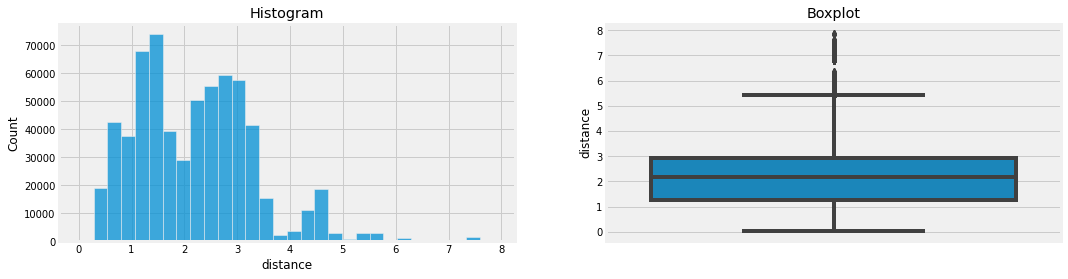


distance - After Trimming


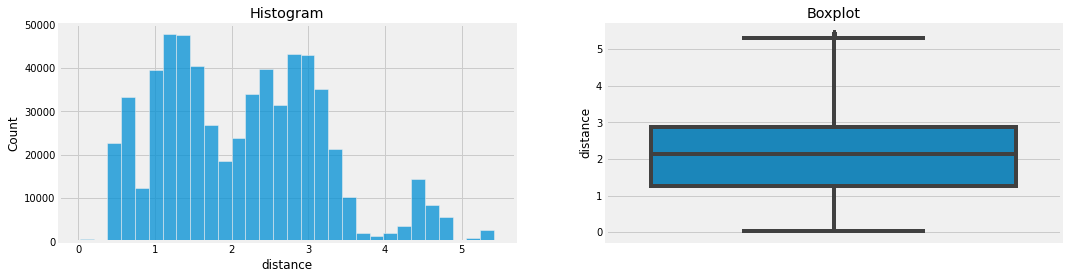

\windGust - Before Trimming


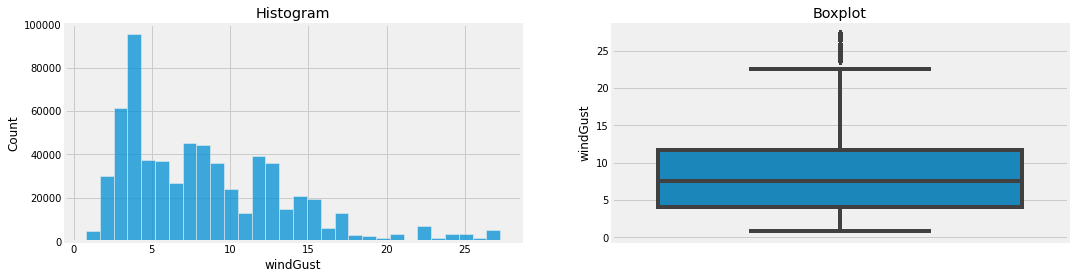


windGust - After Trimming


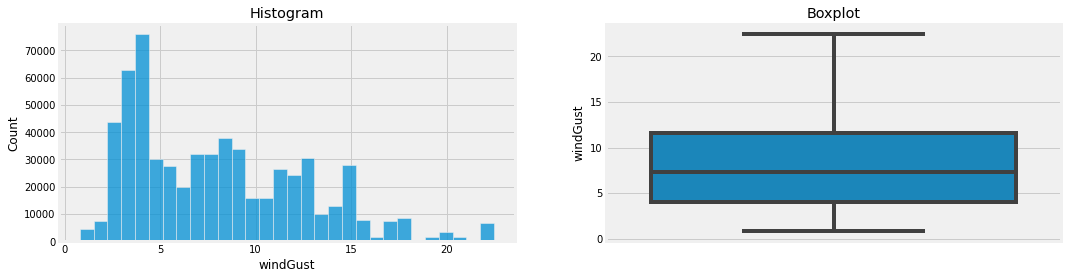


temperatureMin - Before Trimming


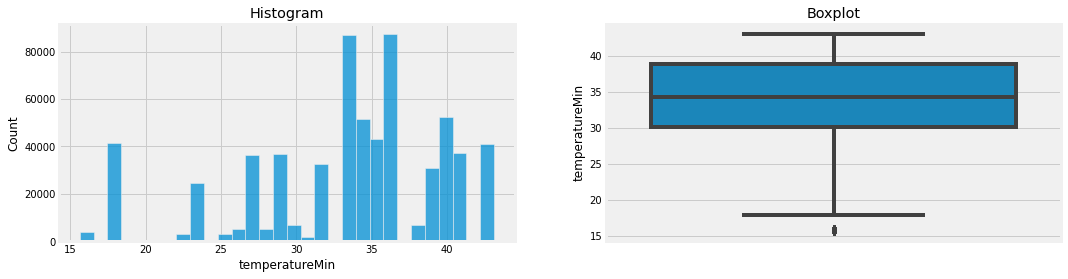


temperatureMin - After Trimming


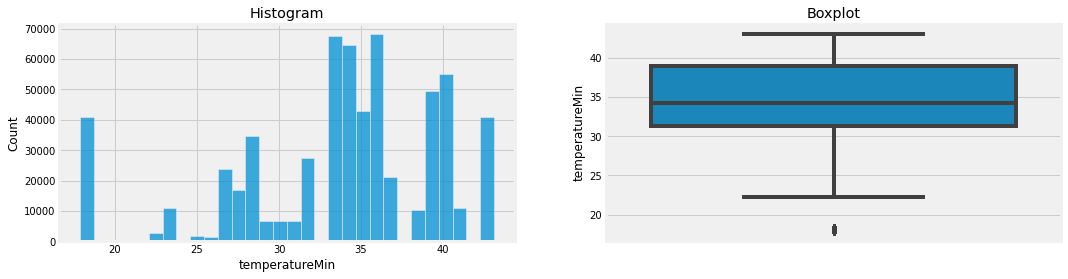

In [38]:
# Let's find outliers in `distance`, `windGust`, `temperatureMin`, 

print('distance - Before Trimming')
diagnostic_plots(cab[num_feature], 'distance')
print('\ndistance - After Trimming')
diagnostic_plots(cab_trimmed, 'distance')

print('\windGust - Before Trimming')
diagnostic_plots(cab[num_feature], 'windGust')
print('\nwindGust - After Trimming')
diagnostic_plots(cab_trimmed, 'windGust')

print('\ntemperatureMin - Before Trimming')
diagnostic_plots(cab[num_feature], 'temperatureMin')
print('\ntemperatureMin - After Trimming')
diagnostic_plots(cab_trimmed, 'temperatureMin')

###6.2 SPLIT DATA

####6.2.1 NUMERIK FITUR

Saya memutuskan untuk hanya menggunakan beberapa variabel pada fitur numerik dengan nilai korelasi tertinggi terhadap price

In [39]:
num_feature = cab_trimmed[num_feature].loc[:, ['distance', 'surge_multiplier', 'visibility', 'visibility.1', 'windBearing', 'humidity', 'precipIntensityMax']]

In [40]:
X_num = num_feature
y = cab_trimmed.price

In [41]:
X_train_num, X_test_num, y_train, y_test = train_test_split(X_num, y, test_size = 0.20, random_state = 42)

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_num)
X_train_num = scaler.transform(X_train_num)
X_test_num = scaler.transform(X_test_num)

####6.2.2 NON NUMERIK FITUR (KATEGORIK)

Saya memutuskan hanya menggunakan 4 fitur pada fitur non numerik (kategorik) berdasarkan intuisi mengenai fitur yang paling berpengaruh dalam naik turunnya harga cab (taksi).

1.   **source**, berdasarkan intuisi besar kecilnya harga dipengaruhi oleh titik awal penjemputan/source (berhubungan erat dengan jarak/distance pada fitur numerik)
2.   **destinaton**, berdasarkan intuisi besar kecilnya harga dipengaruhi oleh tujuan/destination (berhubungan erat dengan jarak/distance pada fitur numerik)
3.   **cab_type**, berdasarkan intuisi besar kecilnya harga juga dipengaruhi oleh jenis aplikasi antar jemput menggunakan taksi, karena cab dan lyft tentu saja memiliki standar penentuan harga yang berbeda
4.   **icon**, berdasarkan intuisi besar kecilnya harga juga dipengaruhi oleh cuaca, dan variabel icon ini cukup mewakili keadaan cuaca yang terjadi pada perjalanan tersebut dengan lebih jelas dan sederhana





In [44]:
cat_feature = cab_trimmed[cat_feature].loc[:, ['source', 'destination', 'cab_type', 'icon']]

In [45]:
X_cat = cat_feature
y = cab_trimmed.price

In [46]:
X_train_cat, X_test_cat, y_train, y_test = train_test_split(X_cat, y, test_size = 0.20, random_state = 42)

In [47]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
oe.fit(X_train_cat)
X_train_cat = oe.fit_transform(X_train_cat)
X_test_cat = oe.transform(X_test_cat)

In [48]:
processed_data_train = np.concatenate([X_train_num, X_train_cat], axis=1)
X_train = processed_data_train
X_train

array([[-0.19535447, -0.15844673, -1.38380942, ...,  7.        ,
         0.        ,  6.        ],
       [-0.63954094, -0.15844673, -2.04067395, ...,  0.        ,
         0.        ,  2.        ],
       [ 1.0048941 ,  5.04793966, -1.99125706, ...,  7.        ,
         0.        ,  2.        ],
       ...,
       [ 3.05571253, -0.15844673,  0.53432626, ...,  2.        ,
         0.        ,  0.        ],
       [-0.95141656, -0.15844673,  0.48871067, ..., 10.        ,
         1.        ,  4.        ],
       [ 0.02201339, -0.15844673, -2.18208229, ...,  9.        ,
         1.        ,  6.        ]])

In [49]:
processed_data_test = np.concatenate([X_test_num, X_test_cat], axis=1)
X_test = processed_data_test
X_test

array([[-1.08372742, -0.15844673,  0.56853796, ...,  4.        ,
         1.        ,  5.        ],
       [ 2.16733957, -0.15844673, -1.40091526, ...,  2.        ,
         1.        ,  6.        ],
       [ 0.95764022, -0.15844673,  0.57423991, ...,  3.        ,
         0.        ,  5.        ],
       ...,
       [ 0.65521539, -0.15844673,  0.52482302, ...,  3.        ,
         1.        ,  5.        ],
       [-0.58283629, -0.15844673,  0.59818809, ...,  9.        ,
         0.        ,  2.        ],
       [-1.07427665, -0.15844673,  0.44917716, ...,  7.        ,
         0.        ,  2.        ]])

#7. PENDEFINISIAN MODEL

In [50]:
from sklearn.linear_model import LinearRegression

#fitting training data to model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

#8. PELATIHAN MODEL

In [56]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#predicting r2 score from training data
y_pred_linear_train = lr.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)


#predicting r2 score from test data
y_pred_linear_test = lr.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# rmse_linear_test = np.sqrt(mean_squared_error(y_test, y_pred_linear_test))

print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
# print("RMSE: ", rmse_linear_test)

#predicting mae score from test data
mae_linear_test = mean_absolute_error(y_test, y_pred_linear_test)
print("MAE: ", mae_linear_test)

R2_score (train):  0.16967090374047067
R2_score (test):  0.17094352398266188
MAE:  6.858649137826348


In [57]:
cab['price'].unique()

array([ 5.  , 11.  ,  7.  , 26.  ,  9.  , 16.5 , 10.5 ,  3.  , 27.5 ,
       13.5 , 12.  , 16.  ,  7.5 ,  5.5 ,  3.5 ,  8.5 , 15.  , 20.5 ,
       19.5 , 29.5 ,  9.5 , 22.  , 13.  , 17.  , 10.  , 34.  , 18.5 ,
       36.  , 22.5 , 32.5 , 25.  , 27.  , 35.  ,  8.  , 23.5 , 14.  ,
       26.5 , 38.5 , 23.  , 30.5 , 17.5 , 30.  , 36.5 , 12.5 , 33.5 ,
       21.5 , 38.  , 18.  , 33.  , 32.  ,  6.5 , 11.5 , 31.5 , 28.5 ,
       24.  , 29.  , 31.  , 42.5 , 41.  , 19.  , 52.5 , 67.5 , 15.5 ,
       21.  , 45.5 , 28.  , 37.5 , 14.5 , 47.5 ,  4.5 , 40.5 , 55.  ,
       42.  , 46.5 , 50.5 , 24.5 , 41.5 , 56.  , 25.5 , 39.  , 57.5 ,
       20.  , 39.5 ,  6.  , 35.5 , 48.5 , 37.  , 45.  , 44.  , 34.5 ,
        2.5 , 46.  , 48.  , 47.  , 54.  , 52.  , 62.  , 43.  , 43.5 ,
       80.  , 65.  , 51.5 , 40.  , 49.5 , 58.  , 75.  , 62.5 , 92.  ,
       87.  , 64.5 , 87.5 , 73.5 , 44.5 , 80.5 , 89.  , 53.  , 81.5 ,
       60.5 , 49.  , 53.5 , 51.  , 55.5 , 37.85, 59.  , 18.35, 54.5 ,
       76.  , 57.  ,

Hasil dari MAE menunjukkan berada dalam rentang harga yang ada pada variabel price.

#9. MODEL INFERENCE

In [70]:
'''
Dimana data baru ini berisi perjalanan menggunakan Uber dari Haymarket Square
menuju South Station (jarak 0.33) dalam keadaan hujan dengan nilai visibilitas
8.9, kekuatan angin 43, kelembapan 0.59, intensitas tebing yang dilewati 0.1342.

'''

pred_data_num = [[0.33, 1.0, 8.9, 8.9, 43, 0.56, 0.1342]]
num = scaler.transform(pred_data_num)
pred_data_cat = [['Haymarket Square', 'South Station', 'Uber', 'rain']]
cat = oe.fit_transform(pred_data_cat)

In [71]:
predict_data = np.concatenate([num, cat], axis=1)
result = lr.predict(predict_data)
result

array([11.06823464])

#10. KESIMPULAN

###10.1 KESIMPULAN DARI MODEL ANALYSIS

In [ ]:
'''
Dari model yang dibangun menghasilkan:

R2_score (train):  0.16967090374047067
R2_score (test):  0.17094352398266188
MAE:  6.858649137826348

Hasil dari MAE menunjukkan berada dalam rentang harga yang ada pada variabel 
price.

Pada tahapan model inference, menguji performa model dengan memprediksi harga
dari data baru, data yang belum pernah dipake untuk pelatihan dan pengujian.

Dimana data baru ini berisi perjalanan menggunakan Uber dari Haymarket Square
menuju South Station (jarak 0.33) dalam keadaan hujan dengan nilai visibilitas
8.9, kekuatan angin 43, kelembapan 0.59, intensitas tebing yang dilewati 0.1342.
Dalam keadaan tersebut setelah diprediksi menghasilkan harga taksi (uber) sebesar
$USD 11.06
'''

###10.2 KESIMPULAN DARI OVERALL ANALYSIS

#####10.2.1 EDA




1.   **Visualisasi variabel price terhadap variabel lainnya**


*   Secara logika semakin jauh jarak maka semakin besar harga yang akan dibayar, dari hasil visualisasi terbukti bahwa semakin besar nilai pada variabel distance, nilai pada variabel price juga semakin besar.
*   Terlihat bahwa nilai pada variabel humidity(kelembapan) dan nilai pada variabel price tidak saling mempengaruhi
*   Terlihat bahwa nilai pada variabel humidity(kelembapan) dan nilai pada variabel price tidak saling mempengaruhi





2.   **Visualisasi Distribusi Data pada Fitur Numerik**


*   Visualisasi distribusi data fitur numerik menunjukkan bahwa kolom **surge_multiplier**, **precipIntensity**, **precipProbability**, **visibility**, **cloudCover**, **visibility.1**, **precipIntensityMax** memiliki distribusi yang sangat miring (skewed), sedangkan yang kolom lain tampaknya memiliki distribusi data normal atau bimodel
*   Terlihat juga dari hasil visualisasi bahwa terdapat beberapa variabel yang mengandung outlier





3. **Heatmap**

*   Dari matriks korelasi, terlihat bahwa **windGustTime** dan kolom yang mengandung kata '+time', ozone dan moonPhase adalah fitur yang sangat berkorelasi
*   Dari matrik korelasi, terlihat bahwa **temperature** dan kolom yang mengandung kata '+temperature' adalah fitur yang sangat berkorelasi
*   Kolom distance dan surge_multiplier memiliki skor korelasi yang cukup dengan price dan merupakan indikasi yang baik untuk digunakan sebagai prediktor

Beberapa variabel hasil heatmap dengan nilai korelasi tertinggi saat dibandingkan dengan variabel price:

*   distance 0.35
*   surge_multiplier 0.24
*   visibility 0.0015
*   visibility.1 0.0015
*   windBearing 0.0014
*   windGust 0.0012
*   humidity 0.0012
*   precipIntensityMax 0.0011

#####10.2.2 Handling Outlier

**Saya menggunakan capping untuk menghandle variabel yang mengandung outlier dengan presentase outlier diatas 3%**


*   surge_multiplier outliers = 100.00%
*   precipIntensity outliers = 100.00%
*   precipProbability outliers = 100.00%
*   uvIndex outliers = 100.00%
*   latitude outliers = 12.78%

*   temperature outliers = 5.29%
*   apparentTemperature outliers = 7.72%

*   visibility outliers = 19.74%
*   temperatureHigh outliers = 23.65%

*   apparentTemperatureHigh outliers = 10.33%
*   apparentTemperatureLow outliers = 12.65%

*   dewPoint outliers = 5.38%

*   visibility.1 outliers = 19.74%
*   temperatureMax outliers = 19.77%

*   apparentTemperatureMin outliers = 10.97%
*   apparentTemperatureMax outliers = 6.46%

**Saya menggunakan trimming untuk menghandle variabel yang mengandung outlier dengan presentase outlier sama dengan dan dibawah 3%**
*   distance outliers = 1.27%
*   windGust outliers = 2.43%
*   temperatureMin outliers = 0.64%

**setelah ditrim variabel pada fitur numerik menghilangkan 26060 data atau sekitar 4% data dari dataset yang digunakan.**

#####10.2.3 Split Data

**Saya memutuskan menggunakan proporsi data sebesar 80% untuk training dan 20% untuk testing**

*   Saya memutuskan untuk hanya menggunakan beberapa variabel pada fitur numerik dengan nilai korelasi tertinggi terhadap price
*   Saya memutuskan hanya menggunakan 4 fitur pada fitur non numerik (kategorik) berdasarkan intuisi mengenai fitur yang paling berpengaruh dalam naik turunnya harga cab (taksi).

1.   **source**, berdasarkan intuisi besar kecilnya harga dipengaruhi oleh titik awal penjemputan/source (berhubungan erat dengan jarak/distance pada fitur numerik)
2.   **destinaton**, berdasarkan intuisi besar kecilnya harga dipengaruhi oleh tujuan/destination (berhubungan erat dengan jarak/distance pada fitur numerik)
3.   **cab_type**, berdasarkan intuisi besar kecilnya harga juga dipengaruhi oleh jenis aplikasi antar jemput menggunakan taksi, karena cab dan lyft tentu saja memiliki standar penentuan harga yang berbeda
4.   **icon**, berdasarkan intuisi besar kecilnya harga juga dipengaruhi oleh cuaca, dan variabel icon ini cukup mewakili keadaan cuaca yang terjadi pada perjalanan tersebut dengan lebih jelas dan sederhana



